## Survey Genuiness Identification 
### Steps:
    1)Read the data set - Train and Validation set
    2)Exploratory data analysis
    3)Data pre-processing
    4)Splitting the train data set to train and test set
    5)Sample the train data set using SMOTE
    6)Feature Selection SelectKBest and RandomForest
    7) Modeling:
        1) Logistic regression
        2) Decision Tree
        3) Random Forest
        4) Gradient Boosting
        5) SVC
    8) Validation on validation data set
    
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('ticks')

import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
survey_rawdata = pd.read_csv('data_complete_for_ML_31_08_analyse.csv')

In [3]:
survey_rawdata.shape

(194968, 27)

## The data has been split into (random split) train and validation set. Read the train and validation data set

In [4]:
train_data = pd.read_csv('train_data.csv')
validation_data = pd.read_csv('validation_data.csv')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130628 entries, 0 to 130627
Data columns (total 28 columns):
Unnamed: 0              130628 non-null int64
Seq                     78715 non-null float64
connection              130628 non-null object
gyro_start              130628 non-null object
gyro_end                130628 non-null object
time                    130628 non-null object
Q1                      130628 non-null object
T1                      130628 non-null int64
Q2                      120886 non-null object
T2                      120886 non-null float64
Q3                      113302 non-null object
T3                      113302 non-null float64
Q4                      97176 non-null object
T4                      97176 non-null float64
Q5                      90110 non-null object
T5                      90110 non-null float64
Q6                      85929 non-null object
T6                      85929 non-null float64
Q7                      83846 non-null object


In [6]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64340 entries, 0 to 64339
Data columns (total 28 columns):
Unnamed: 0              64340 non-null int64
Seq                     38821 non-null float64
connection              64340 non-null object
gyro_start              64340 non-null object
gyro_end                64340 non-null object
time                    64340 non-null object
Q1                      64340 non-null object
T1                      64340 non-null int64
Q2                      59447 non-null object
T2                      59447 non-null float64
Q3                      55678 non-null object
T3                      55678 non-null float64
Q4                      47775 non-null object
T4                      47775 non-null float64
Q5                      44436 non-null object
T5                      44436 non-null float64
Q6                      42436 non-null object
T6                      42436 non-null float64
Q7                      41451 non-null object
T7           

In [7]:
## Remove Unnamed: 0 column
train_data.drop(columns='Unnamed: 0', axis=1, inplace=True)
validation_data.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [8]:
train_data.head()

,Seq,connection,gyro_start,gyro_end,time,Q1,T1,Q2,T2,Q3,...,Q7,T7,Q8,T8,Q9,T9,isRewardedSlot,isComplete,isFirstBogusCorrect,isSecondBogusCorrect
0,102000102.0,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",25/08/18 20:09,Male,16,< 18 years,20.0,Android,...,Single,36.0,None,41.0,Very True,48.0,0,1,1,1
1,111020113.0,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",25/08/18 4:48,Male,9,18 - 24 years,15.0,Android,...,Single,38.0,1,43.0,Very True,52.0,0,1,1,1
2,NaN,wifi,"using your phone, sitting or standing","using your phone, sitting or standing",23/08/18 12:07,Male,1,35 - 44 years,2.0,Android,...,Separated,6.0,1,7.0,Very True,7.0,1,1,1,1
3,102441042.0,wifi,"using your phone, sitting or standing","using your phone, sitting or standing",29/08/18 14:57,Male,5,< 18 years,7.0,iOS,...,Married,25.0,4 or more,28.0,Very True,38.0,1,1,0,1
4,NaN,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",23/08/18 14:01,Female,9,< 18 years,14.0,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0


## Check data set size

In [9]:
train_data.shape, validation_data.shape

((130628, 27), (64340, 27))

# 1) Exploratory Data Analysis

## Check the completeness of response

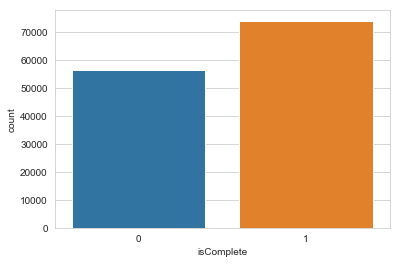

In [10]:
sns.set_style('whitegrid')
sns.countplot(x = 'isComplete', data = train_data)

In [11]:
train_data['isComplete'].value_counts()

1    74092
0    56536
Name: isComplete, dtype: int64

In [12]:
print("Completed responses is", round(((110591/len(train_data))*100),2) , "% of total data set")

Completed responses is 84.66 % of total data set


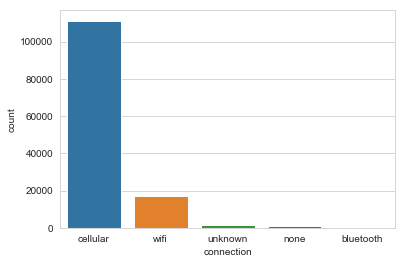

In [13]:
sns.set_style('whitegrid')
sns.countplot(x = 'connection', data = train_data)

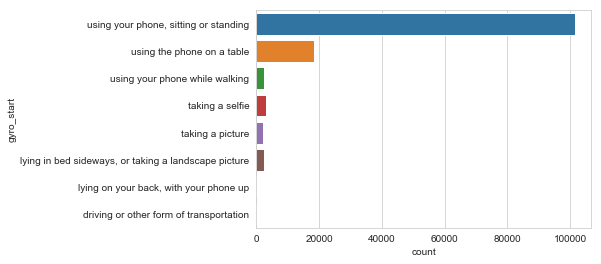

In [14]:
sns.set_style('whitegrid')
sns.countplot(y = 'gyro_start', data = train_data)

In [15]:
train_data['gyro_start'].value_counts()

using your phone, sitting or standing                   101582
using the phone on a table                               18341
taking a selfie                                           3149
using your phone while walking                            2600
lying in bed sideways, or taking a landscape picture      2437
taking a picture                                          2035
lying on your back, with your phone up                     278
driving or other form of transportation                    206
Name: gyro_start, dtype: int64

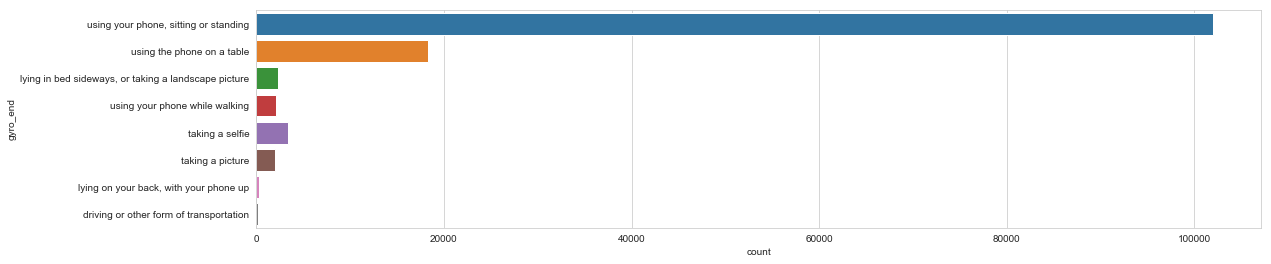

In [16]:
fig, ax = plt.subplots(figsize=(18,4))
sns.set_style('whitegrid')
sns.countplot(y = 'gyro_end', data = train_data)

In [17]:
train_data['gyro_end'].value_counts()

using your phone, sitting or standing                   101977
using the phone on a table                               18343
taking a selfie                                           3358
lying in bed sideways, or taking a landscape picture      2341
using your phone while walking                            2116
taking a picture                                          1976
lying on your back, with your phone up                     326
driving or other form of transportation                    191
Name: gyro_end, dtype: int64

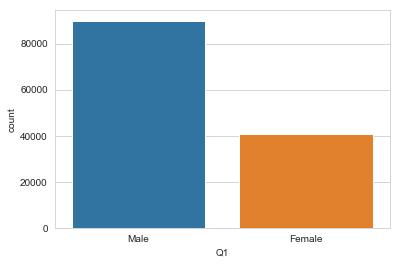

In [18]:
sns.set_style('whitegrid')
sns.countplot(x = 'Q1', data = train_data)

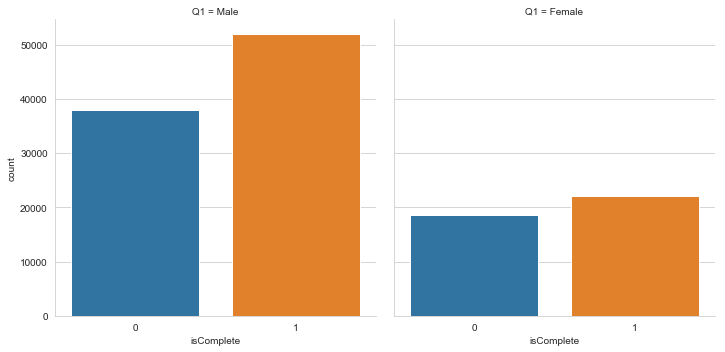

In [19]:
# kind is the facets
sns.factorplot(x='isComplete', col='Q1', kind='count', data=train_data)

In [20]:
# Chain calculations
print(train_data[train_data.Q1 == 'Female'].isComplete.sum() /
      train_data[train_data.Q1 == 'Female'].isComplete.count())

print(train_data[train_data.Q1 == 'Male'].isComplete.sum() /
      train_data[train_data.Q1 == 'Male'].isComplete.count())

0.5414537055238844
0.5788484632833697


### Majority of survey partcipants are Males. 

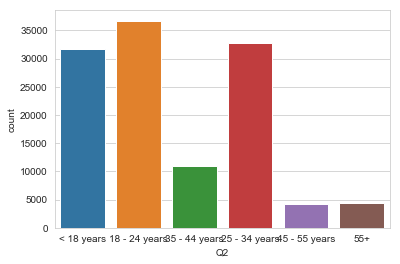

In [21]:
sns.set_style('whitegrid')
sns.countplot(x = 'Q2', data = train_data)

## Major portion of the response came from youngesters, people aged  <34years 

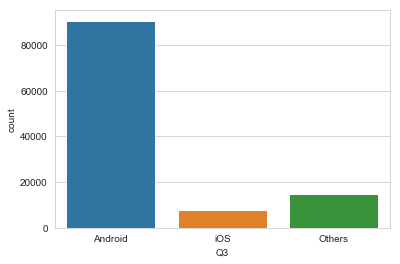

In [22]:
sns.set_style('whitegrid')
sns.countplot(x = 'Q3', data = train_data)

### Note: Most people participated in the survey use Android OS.

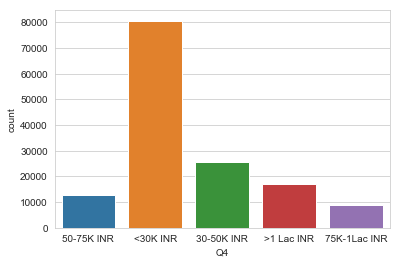

In [23]:
sns.set_style('whitegrid')
sns.countplot(x = 'Q4', data = survey_rawdata)

### Note: From the answers to Q2 and Q4 we can observe that the people on the initial phase of their career (youngesters with sal <30K) mostly responded to the survey. But we need to check how genuine their response are. 

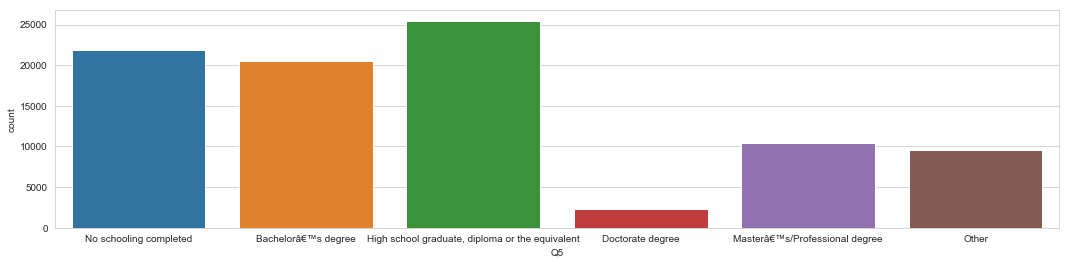

In [24]:
fig, ax = plt.subplots(figsize=(18,4))
#sns.set_style('whitegrid')
sns.countplot(ax=ax,x = 'Q5', data = train_data)

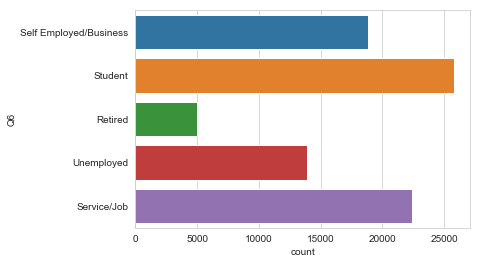

In [25]:
sns.set_style('whitegrid')
sns.countplot(y = 'Q6', data = train_data)

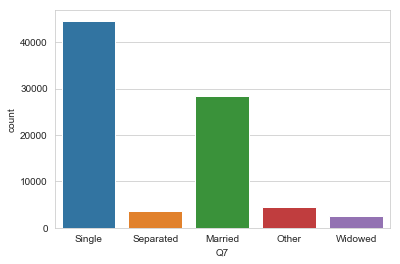

In [26]:
sns.set_style('whitegrid')
sns.countplot(x = 'Q7', data = train_data)

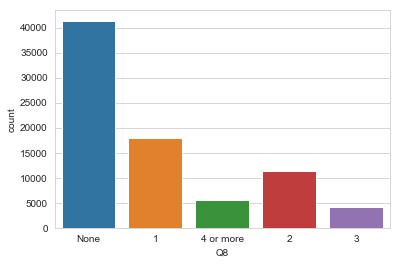

In [27]:
sns.set_style('whitegrid')
sns.countplot(x = 'Q8', data = train_data)

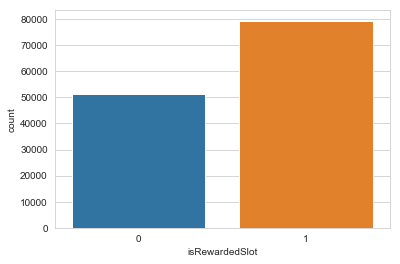

In [28]:
sns.set_style('whitegrid')
sns.countplot(x = 'isRewardedSlot', data = train_data)

# Data Cleaning

In [29]:
import missingno as msno

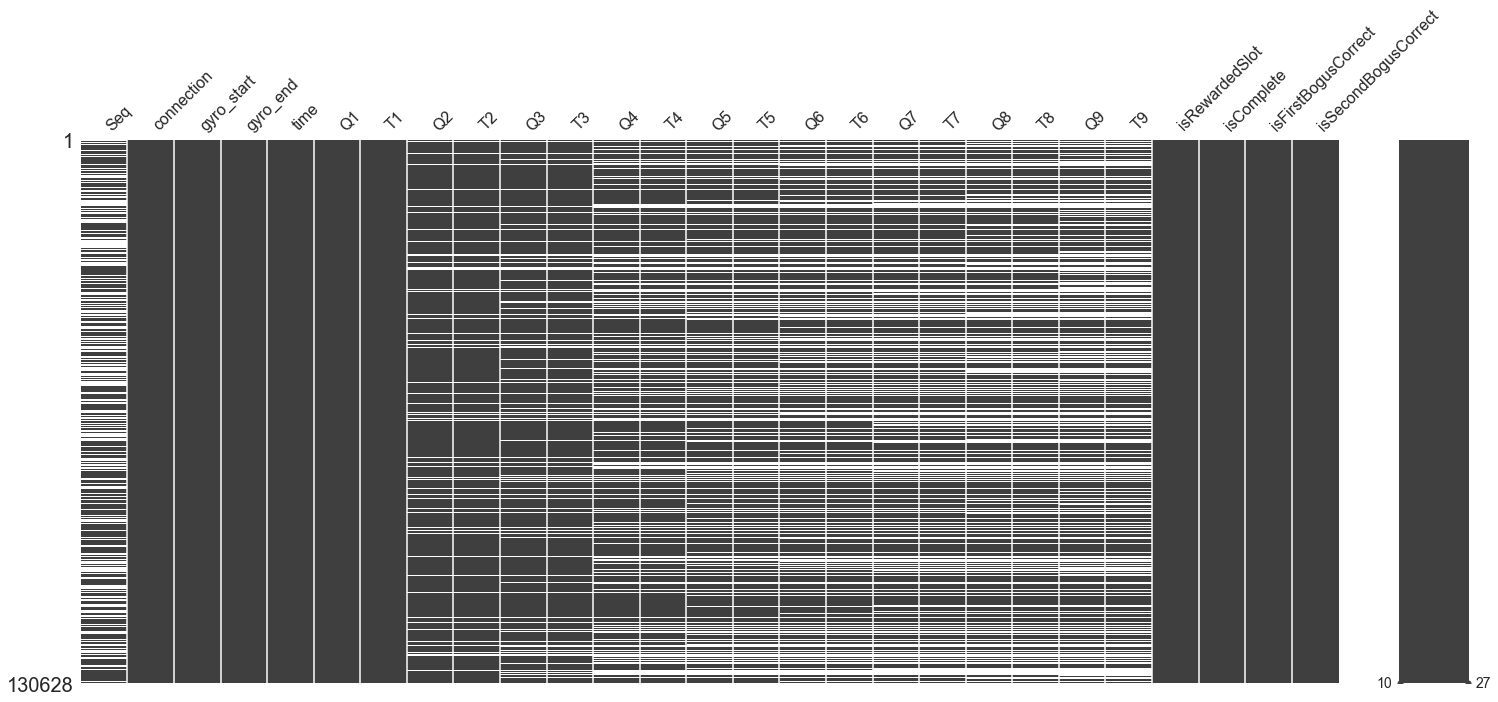

In [30]:
msno.matrix(train_data)

### Remove the columns that have all null values

In [31]:
nullcols = train_data.isnull().sum()
nullcols

Seq                     51913
connection                  0
gyro_start                  0
gyro_end                    0
time                        0
Q1                          0
T1                          0
Q2                       9742
T2                       9742
Q3                      17326
T3                      17326
Q4                      33452
T4                      33452
Q5                      40518
T5                      40518
Q6                      44699
T6                      44699
Q7                      46782
T7                      46782
Q8                      50226
T8                      50226
Q9                      56536
T9                      56536
isRewardedSlot              0
isComplete                  0
isFirstBogusCorrect         0
isSecondBogusCorrect        0
dtype: int64

In [32]:
### Check Null columns for validation data
nullcols_validation = validation_data.isnull().sum()
nullcols_validation

Seq                     25519
connection                  0
gyro_start                  0
gyro_end                    0
time                        0
Q1                          0
T1                          0
Q2                       4893
T2                       4893
Q3                       8662
T3                       8662
Q4                      16565
T4                      16565
Q5                      19904
T5                      19904
Q6                      21904
T6                      21904
Q7                      22889
T7                      22889
Q8                      24699
T8                      24699
Q9                      27841
T9                      27841
isRewardedSlot              0
isComplete                  0
isFirstBogusCorrect         0
isSecondBogusCorrect        0
dtype: int64

###  Note: There is no columns that have all null values.

In [33]:
train_data.shape , validation_data.shape

((130628, 27), (64340, 27))

### Find columns that have >70 percentage null values. We can drop those columns.

In [34]:
# Find columns that have >70 percentage null values. We can drop those columns.
def get_null_cols(df):
    all_cols = df.columns
    null_col_list = []
    for col in all_cols:
        if((df[col].isnull().sum()/len(df))*100 >= 70):
            null_col_list.append(col)
    return null_col_list

In [35]:
null_cols = get_null_cols(train_data)

In [36]:
len(null_cols)

0

###  Note: There is no columns that have more than 70% null values.

In [37]:
train_data.shape

(130628, 27)

### Drop seq column

In [38]:
survey_df = train_data.drop(columns='Seq', axis=1)
validation_df = validation_data.drop(columns='Seq', axis=1)

In [39]:
survey_df.shape, validation_df.shape

((130628, 26), (64340, 26))

##  Data Imputation

In [40]:
# Drop null raws as many of the questions are unanswered.
#survey_df.dropna(axis=0, how='any', inplace=True)

In [41]:
question_cols = ['Q1', 'Q2', 'Q3','Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9']

In [42]:
# Replace the unanswered questions with value 'unknown'
for col in question_cols:
    survey_df[col].replace(np.nan, 'Unknown', inplace = True)

In [43]:
# Replace the unanswered questions with value 'unknown'
for col in question_cols:
    validation_df[col].replace(np.nan, 'Unknown', inplace = True)

In [44]:
survey_df.shape, validation_df.shape

((130628, 26), (64340, 26))

In [45]:
survey_df.isnull().sum()

connection                  0
gyro_start                  0
gyro_end                    0
time                        0
Q1                          0
T1                          0
Q2                          0
T2                       9742
Q3                          0
T3                      17326
Q4                          0
T4                      33452
Q5                          0
T5                      40518
Q6                          0
T6                      44699
Q7                          0
T7                      46782
Q8                          0
T8                      50226
Q9                          0
T9                      56536
isRewardedSlot              0
isComplete                  0
isFirstBogusCorrect         0
isSecondBogusCorrect        0
dtype: int64

In [46]:
time_cols = ['T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

In [47]:
survey_df.shape

(130628, 26)

In [48]:
### Derive Time Features

In [49]:
survey_df['T2_Actual'] = survey_df['T2'] - survey_df['T1']
survey_df['T3_Actual'] = survey_df['T3'] - survey_df['T2']
survey_df['T4_Actual'] = survey_df['T4'] - survey_df['T3']
survey_df['T5_Actual'] = survey_df['T5'] - survey_df['T4']
survey_df['T6_Actual'] = survey_df['T6'] - survey_df['T5']
survey_df['T7_Actual'] = survey_df['T7'] - survey_df['T6']
survey_df['T8_Actual'] = survey_df['T8'] - survey_df['T7']
survey_df['T9_Actual'] = survey_df['T9'] - survey_df['T8']

In [50]:
validation_df['T2_Actual'] = validation_df['T2'] - validation_df['T1']
validation_df['T3_Actual'] = validation_df['T3'] - validation_df['T2']
validation_df['T4_Actual'] = validation_df['T4'] - validation_df['T3']
validation_df['T5_Actual'] = validation_df['T5'] - validation_df['T4']
validation_df['T6_Actual'] = validation_df['T6'] - validation_df['T5']
validation_df['T7_Actual'] = validation_df['T7'] - validation_df['T6']
validation_df['T8_Actual'] = validation_df['T8'] - validation_df['T7']
validation_df['T9_Actual'] = validation_df['T9'] - validation_df['T8']

In [51]:
survey_df.rename(columns={'T1': 'T1_Actual'}, index =str, inplace=True)

In [52]:
validation_df.rename(columns={'T1': 'T1_Actual'}, index =str, inplace=True)

In [53]:
times = ['T1_Actual', 'T2_Actual', 'T3_Actual','T4_Actual', 'T5_Actual', 'T6_Actual', 'T7_Actual', 'T8_Actual', 'T9_Actual']

In [54]:
survey_df.shape, validation_df.shape

((130628, 34), (64340, 34))

In [55]:
survey_df.drop(columns=['T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9'], inplace=True)

In [56]:
validation_df.drop(columns=['T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9'], inplace=True)

In [57]:
survey_df.shape, validation_df.shape

((130628, 26), (64340, 26))

In [58]:
# Replace the unknown time with value mean time
for col in times:
    survey_df[col].replace(np.nan, survey_df[col].mean(), inplace = True)
    
# Replace the unknown time with value mean time for validation data
for col in times:
    validation_df[col].replace(np.nan, validation_df[col].mean(), inplace = True)


In [59]:
survey_df['Total_time'] = survey_df['T1_Actual'] + survey_df['T2_Actual'] +survey_df['T3_Actual'] +survey_df['T4_Actual']+ survey_df['T5_Actual'] + survey_df['T6_Actual'] +survey_df['T7_Actual'] +survey_df['T8_Actual']+ survey_df['T9_Actual']
survey_df.head()

,connection,gyro_start,gyro_end,time,Q1,T1_Actual,Q2,Q3,Q4,Q5,...,isSecondBogusCorrect,T2_Actual,T3_Actual,T4_Actual,T5_Actual,T6_Actual,T7_Actual,T8_Actual,T9_Actual,Total_time
0,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",25/08/18 20:09,Male,16,< 18 years,Android,<30K INR,No schooling completed,...,1,4.0,3.0,2.000000,4.000000,4.000000,3.0000,5.000000,7.000000,48.00000
1,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",25/08/18 4:48,Male,9,18 - 24 years,Android,<30K INR,Bachelorâ€™s degree,...,1,6.0,3.0,11.000000,5.000000,2.000000,2.0000,5.000000,9.000000,52.00000
2,wifi,"using your phone, sitting or standing","using your phone, sitting or standing",23/08/18 12:07,Male,1,35 - 44 years,Android,50-75K INR,"High school graduate, diploma or the equivalent",...,1,1.0,1.0,1.000000,0.000000,1.000000,1.0000,1.000000,0.000000,7.00000
3,wifi,"using your phone, sitting or standing","using your phone, sitting or standing",29/08/18 14:57,Male,5,< 18 years,iOS,>1 Lac INR,Doctorate degree,...,1,2.0,2.0,2.000000,8.000000,4.000000,2.0000,3.000000,10.000000,38.00000
4,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",23/08/18 14:01,Female,9,< 18 years,Android,Unknown,Unknown,...,0,5.0,8.0,6.093212,6.417945,4.491604,2.6612,4.532711,7.312139,53.50881


In [60]:
validation_df['Total_time'] = validation_df['T1_Actual'] + validation_df['T2_Actual'] +validation_df['T3_Actual'] +validation_df['T4_Actual']+ validation_df['T5_Actual'] + validation_df['T6_Actual'] +validation_df['T7_Actual'] +validation_df['T8_Actual']+ validation_df['T9_Actual']
validation_df.head()

,connection,gyro_start,gyro_end,time,Q1,T1_Actual,Q2,Q3,Q4,Q5,...,isSecondBogusCorrect,T2_Actual,T3_Actual,T4_Actual,T5_Actual,T6_Actual,T7_Actual,T8_Actual,T9_Actual,Total_time
0,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",29/08/18 13:18,Male,12,25 - 34 years,Others,30-50K INR,Unknown,...,0,5.0,4.000000,6.000000,6.373346,4.394688,2.649442,4.459348,7.251706,52.128529
1,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",23/08/18 12:34,Male,2,< 18 years,Others,<30K INR,"High school graduate, diploma or the equivalent",...,1,5.0,1.000000,2.000000,5.000000,2.000000,1.000000,2.000000,0.000000,20.000000
2,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",25/08/18 3:20,Male,4,55+,Android,<30K INR,Bachelorâ€™s degree,...,1,3.0,9.000000,25.000000,8.000000,5.000000,2.000000,8.000000,14.000000,78.000000
3,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",22/08/18 9:22,Male,7,18 - 24 years,Unknown,Unknown,Unknown,...,0,9.0,3.684849,6.006719,6.373346,4.394688,2.649442,4.459348,7.251706,50.820097
4,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",21/08/18 20:10,Female,12,25 - 34 years,Others,Unknown,Unknown,...,0,5.0,4.000000,6.006719,6.373346,4.394688,2.649442,4.459348,7.251706,52.135248


In [61]:
time_cols = ['T1_Actual', 'T2_Actual', 'T3_Actual','T4_Actual', 'T5_Actual', 'T6_Actual', 'T7_Actual', 'T8_Actual', 'T9_Actual','Total_time']

In [62]:
survey_df.isnull().sum()

connection              0
gyro_start              0
gyro_end                0
time                    0
Q1                      0
T1_Actual               0
Q2                      0
Q3                      0
Q4                      0
Q5                      0
Q6                      0
Q7                      0
Q8                      0
Q9                      0
isRewardedSlot          0
isComplete              0
isFirstBogusCorrect     0
isSecondBogusCorrect    0
T2_Actual               0
T3_Actual               0
T4_Actual               0
T5_Actual               0
T6_Actual               0
T7_Actual               0
T8_Actual               0
T9_Actual               0
Total_time              0
dtype: int64

In [63]:
validation_df.isnull().sum()

connection              0
gyro_start              0
gyro_end                0
time                    0
Q1                      0
T1_Actual               0
Q2                      0
Q3                      0
Q4                      0
Q5                      0
Q6                      0
Q7                      0
Q8                      0
Q9                      0
isRewardedSlot          0
isComplete              0
isFirstBogusCorrect     0
isSecondBogusCorrect    0
T2_Actual               0
T3_Actual               0
T4_Actual               0
T5_Actual               0
T6_Actual               0
T7_Actual               0
T8_Actual               0
T9_Actual               0
Total_time              0
dtype: int64

In [64]:
survey_df[time_cols].describe()

,T1_Actual,T2_Actual,T3_Actual,T4_Actual,T5_Actual,T6_Actual,T7_Actual,T8_Actual,T9_Actual,Total_time
count,130628.000000,130628.000000,130628.000000,130628.000000,130628.000000,130628.000000,130628.000000,130628.000000,130628.000000,130628.000000
mean,10.077342,4.167546,3.659079,6.093212,6.417945,4.491604,2.661200,4.532711,7.312139,49.412778
std,46.620867,10.642255,3.168812,6.149833,5.130366,7.345152,3.053423,6.773157,5.852699,52.531052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,2.000000,3.000000,6.000000,39.335436
50%,8.000000,4.000000,3.000000,6.093212,6.417945,4.491604,2.661200,4.532711,7.312139,49.000000
75%,13.000000,5.000000,4.000000,7.000000,7.000000,5.000000,3.000000,4.532711,7.312139,58.000000
max,10785.000000,3233.000000,510.000000,1072.000000,663.000000,2114.000000,642.000000,1321.000000,569.000000,10843.415598


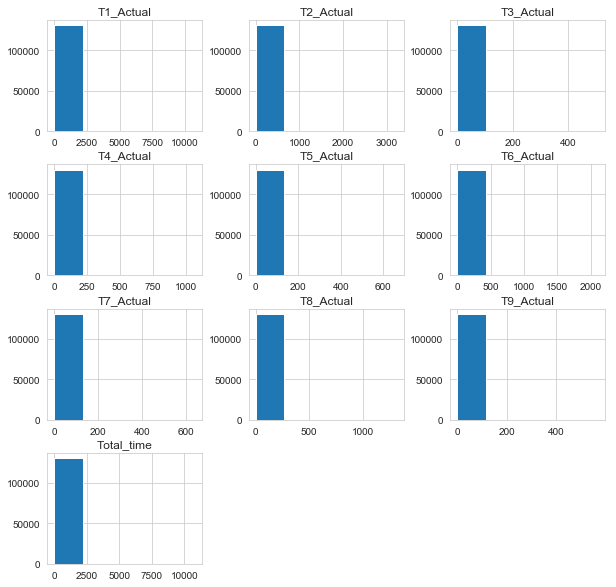

In [65]:
# plot all the columns or variables
pd.DataFrame.hist(survey_df[time_cols], figsize = [10,10], bins=5);

plt.show()

In [66]:
# Find the day of week from the time
survey_df['Day_of_Week'] = pd.to_datetime(survey_df['time']).dt.weekday_name

# Find the day of week from the time for validation data
validation_df['Day_of_Week'] = pd.to_datetime(validation_df['time']).dt.weekday_name

In [67]:
survey_df['Day_of_Week'].head()

0     Saturday
1     Saturday
2     Thursday
3    Wednesday
4     Thursday
Name: Day_of_Week, dtype: object

In [68]:
validation_df['Day_of_Week'].head()

0    Wednesday
1     Thursday
2     Saturday
3    Wednesday
4      Tuesday
Name: Day_of_Week, dtype: object

# Create Genuiness flag based on Bogus questions

In [69]:
survey_df['IsGenuine'] = survey_df['isFirstBogusCorrect']+ survey_df['isSecondBogusCorrect']

In [70]:
validation_df['IsGenuine'] = validation_df['isFirstBogusCorrect']+ validation_df['isSecondBogusCorrect']

In [71]:
survey_df['IsGenuine'].replace(1, 0 , inplace=True)
survey_df['IsGenuine'].replace(2, 1 , inplace=True)

validation_df['IsGenuine'].replace(1, 0 , inplace=True)
validation_df['IsGenuine'].replace(2, 1 , inplace=True)

In [72]:
survey_df.head(3)

,connection,gyro_start,gyro_end,time,Q1,T1_Actual,Q2,Q3,Q4,Q5,...,T3_Actual,T4_Actual,T5_Actual,T6_Actual,T7_Actual,T8_Actual,T9_Actual,Total_time,Day_of_Week,IsGenuine
0,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",25/08/18 20:09,Male,16,< 18 years,Android,<30K INR,No schooling completed,...,3.0,2.0,4.0,4.0,3.0,5.0,7.0,48.0,Saturday,1
1,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",25/08/18 4:48,Male,9,18 - 24 years,Android,<30K INR,Bachelorâ€™s degree,...,3.0,11.0,5.0,2.0,2.0,5.0,9.0,52.0,Saturday,1
2,wifi,"using your phone, sitting or standing","using your phone, sitting or standing",23/08/18 12:07,Male,1,35 - 44 years,Android,50-75K INR,"High school graduate, diploma or the equivalent",...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,7.0,Thursday,1


In [73]:
validation_df.head(3)

,connection,gyro_start,gyro_end,time,Q1,T1_Actual,Q2,Q3,Q4,Q5,...,T3_Actual,T4_Actual,T5_Actual,T6_Actual,T7_Actual,T8_Actual,T9_Actual,Total_time,Day_of_Week,IsGenuine
0,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",29/08/18 13:18,Male,12,25 - 34 years,Others,30-50K INR,Unknown,...,4.0,6.0,6.373346,4.394688,2.649442,4.459348,7.251706,52.128529,Wednesday,0
1,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",23/08/18 12:34,Male,2,< 18 years,Others,<30K INR,"High school graduate, diploma or the equivalent",...,1.0,2.0,5.000000,2.000000,1.000000,2.000000,0.000000,20.000000,Thursday,0
2,cellular,"using your phone, sitting or standing","using your phone, sitting or standing",25/08/18 3:20,Male,4,55+,Android,<30K INR,Bachelorâ€™s degree,...,9.0,25.0,8.000000,5.000000,2.000000,8.000000,14.000000,78.000000,Saturday,1


In [74]:
survey_df['IsGenuine'].value_counts()

0    91982
1    38646
Name: IsGenuine, dtype: int64

In [75]:
print("Genuine responses are", round(((57667/len(survey_df))*100),2) , "% of total data set")

Genuine responses are 44.15 % of total data set


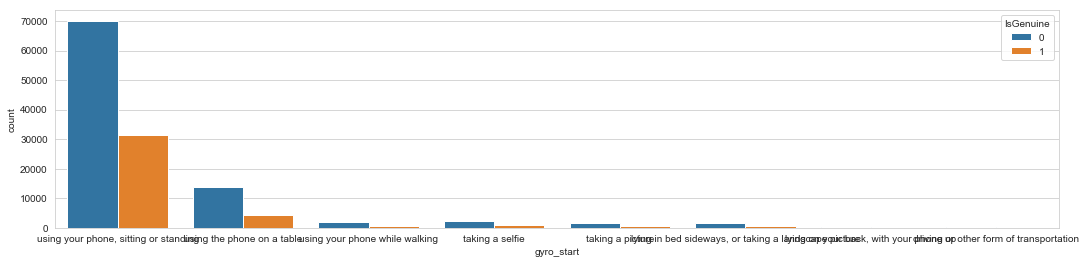

In [76]:
# gyro_start Vs Genuiness
fig, ax = plt.subplots(figsize=(18,4))
#sns.set_style('whitegrid')
sns.countplot(ax=ax, x="gyro_start", hue="IsGenuine", data=survey_df)

In [77]:
survey_df['Q1'].value_counts()

Male      89932
Female    40696
Name: Q1, dtype: int64

In [78]:
# Q1 Vs Genuiness
survey_df[survey_df['IsGenuine'] ==1].Q1.value_counts()

Male      27283
Female    11363
Name: Q1, dtype: int64

In [79]:
round(survey_df[survey_df['IsGenuine'] == 1].Q1.value_counts()/survey_df['Q1'].value_counts(),2)

Male      0.30
Female    0.28
Name: Q1, dtype: float64

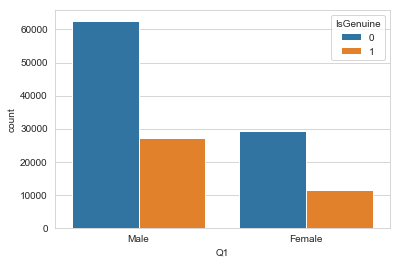

In [80]:
sns.countplot(x="Q1", hue="IsGenuine", data=survey_df)

In [81]:
survey_df[survey_df['IsGenuine'] == 1].Q1.value_counts()[0]

27283

## Only 28% of females and 30 % of males are genuine

### Hypothesis Test for the Genuiness of Female and Male

In [82]:
(survey_df[survey_df['Q1'] == "Female"]).IsGenuine.value_counts()

0    29333
1    11363
Name: IsGenuine, dtype: int64

In [83]:
Female_df = survey_df[['Q1','IsGenuine']][survey_df['Q1'] == "Female"].groupby('IsGenuine').count()

In [84]:
survey_df[['Q1','IsGenuine']].groupby('IsGenuine').count()

,Q1
IsGenuine,
0,91982
1,38646


In [85]:
(survey_df[survey_df['Q1'] == "Female"]).IsGenuine.value_counts()/len(survey_df[survey_df['Q1'] == "Female"])

0    0.720783
1    0.279217
Name: IsGenuine, dtype: float64

In [86]:
survey_df[survey_df['Q1'] == "Female"].IsGenuine.value_counts()

0    29333
1    11363
Name: IsGenuine, dtype: int64

In [87]:
ob_freq1= survey_df[survey_df['Q1'] == "Female"].IsGenuine.value_counts()[0]
ob_freq2= survey_df[survey_df['Q1'] == "Female"].IsGenuine.value_counts()[1]

In [88]:
# Chi-square test for comparing observed distribution and expected distribution of genuiness of female records for alpha=0.05
# H0 : There are 28% genuine female responses and  72 % of non-genuine responses out f all female respondants
Ob_freqs =[ob_freq1,ob_freq2]
count= len(survey_df[survey_df['Q1'] == "Female"])
Exp_freq =[count*0.72, count*0.28]
print(Exp_freq)

[29301.12, 11394.880000000001]


In [89]:
from scipy import stats
stats.chisquare(Ob_freqs,Exp_freq)

Power_divergenceResult(statistic=0.12387805361317063, pvalue=0.7248659041550917)

### Note: As the p-value is more than 0.05, we retain null hypothesis ie, the percentage of genuine female is 28% and non genuine female is 72%

In [90]:
(survey_df[survey_df['Q1'] == "Male"]).IsGenuine.value_counts()/len(survey_df[survey_df['Q1'] == "Male"])

0    0.696626
1    0.303374
Name: IsGenuine, dtype: float64

In [91]:
survey_df[survey_df['Q1'] == "Male"].IsGenuine.value_counts()

0    62649
1    27283
Name: IsGenuine, dtype: int64

In [92]:
ob_freq1= survey_df[survey_df['Q1'] == "Male"].IsGenuine.value_counts()[0]
ob_freq2= survey_df[survey_df['Q1'] == "Male"].IsGenuine.value_counts()[1]

In [93]:
# Chi-square test for comparing observed distribution and expected distribution of genuiness of Male records for alpha=0.05
# H0 : There are 30% genuine female responses and  70 % of non-genuine responses out f all Male respondants
Ob_freqs =[ob_freq1,ob_freq2 ]
count= len(survey_df[survey_df['Q1'] == "Male"])
Exp_freq =[count*0.696, count*0.30]
print(Exp_freq)

[62592.672, 26979.6]


In [94]:
from scipy import stats
stats.chisquare(Ob_freqs,Exp_freq)

Power_divergenceResult(statistic=3.4625852493404055, pvalue=0.0627720987056021)

### Note: As the p-value is more than 0.05, we retain null hypothesis ie, the percentage of genuine female is 30% and non genuine female is 70%

In [95]:
# Q2 Vs Genuiness
round(survey_df[survey_df['IsGenuine'] == 1].Q2.value_counts()/survey_df['Q2'].value_counts(),2)

18 - 24 years    0.37
25 - 34 years    0.39
35 - 44 years    0.34
45 - 55 years    0.29
55+              0.18
< 18 years       0.21
Unknown           NaN
Name: Q2, dtype: float64

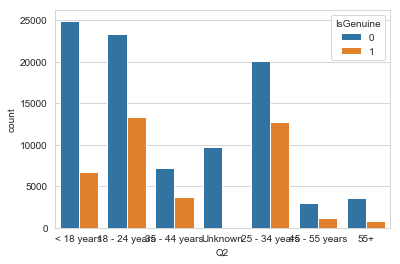

In [96]:
sns.countplot(x="Q2", hue="IsGenuine", data=survey_df)

### Note: The above graph shows the genuiness of each age group. 

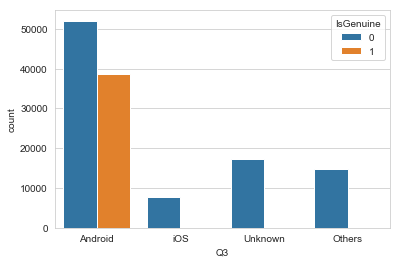

In [97]:
# Q3 Vs Genuiness
sns.countplot(x="Q3", hue="IsGenuine", data=survey_df)

In [98]:
round(survey_df[survey_df['IsGenuine'] == 1].Q3.value_counts()/survey_df['Q3'].value_counts(),2)

Android    0.43
Others      NaN
Unknown     NaN
iOS         NaN
Name: Q3, dtype: float64

In [99]:
survey_df[survey_df['IsGenuine'] == 1].Q3.value_counts()

Android    38646
Name: Q3, dtype: int64

In [100]:
survey_df[survey_df['Q3'] == "Android"].IsGenuine.value_counts()

0    52052
1    38646
Name: IsGenuine, dtype: int64

In [101]:
len(survey_df[survey_df['Q3'] == "Android"])

90698

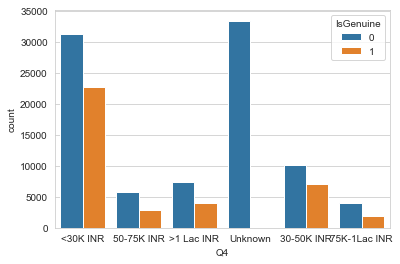

In [104]:
# Q4 Vs Genuiness
sns.countplot(x="Q4", hue="IsGenuine", data=survey_df)

In [105]:
(round(survey_df[survey_df['IsGenuine'] == 1].Q4.value_counts()/survey_df['Q4'].value_counts(),3))


30-50K INR      0.413
50-75K INR      0.336
75K-1Lac INR    0.314
<30K INR        0.421
>1 Lac INR      0.355
Unknown           NaN
Name: Q4, dtype: float64

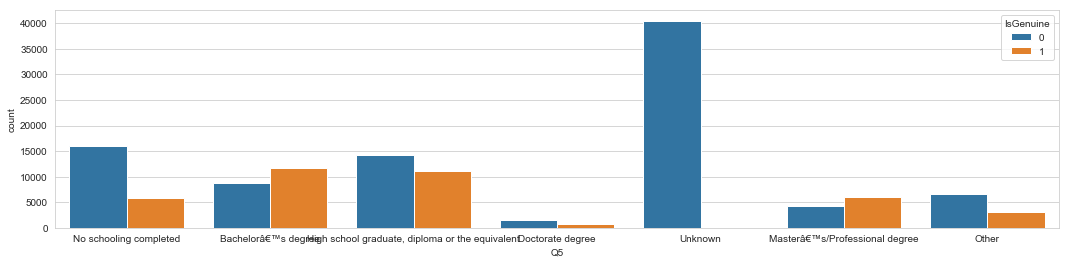

In [106]:
# Q5 Vs Genuiness
fig, ax = plt.subplots(figsize=(18,4))
sns.countplot(x="Q5", hue="IsGenuine", data=survey_df)

In [107]:
df_counts = pd.DataFrame(survey_df[survey_df['IsGenuine'] == 1].Q4.value_counts())
df_counts

,Q4
<30K INR,22777
30-50K INR,7079
>1 Lac INR,4068
50-75K INR,2892
75K-1Lac INR,1830


In [108]:
survey_df[survey_df['IsGenuine'] == 1].Q4.count()

38646

In [109]:
round(survey_df[survey_df['IsGenuine'] == 1].Q5.value_counts()/survey_df['Q5'].value_counts(),2)

Bachelorâ€™s degree                                0.57
Doctorate degree                                   0.32
High school graduate, diploma or the equivalent    0.44
Masterâ€™s/Professional degree                     0.59
No schooling completed                             0.27
Other                                              0.32
Unknown                                             NaN
Name: Q5, dtype: float64

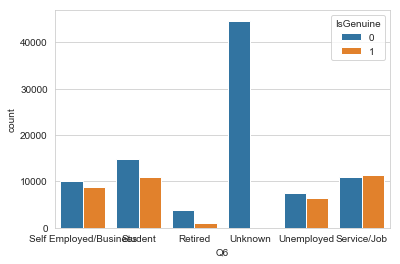

In [110]:
# Q6 Vs Genuiness
sns.countplot(x="Q6", hue="IsGenuine", data=survey_df)

In [111]:
round(survey_df[survey_df['IsGenuine'] == 1].Q6.value_counts()/survey_df['Q6'].value_counts(),2)

Retired                   0.22
Self Employed/Business    0.47
Service/Job               0.51
Student                   0.42
Unemployed                0.46
Unknown                    NaN
Name: Q6, dtype: float64

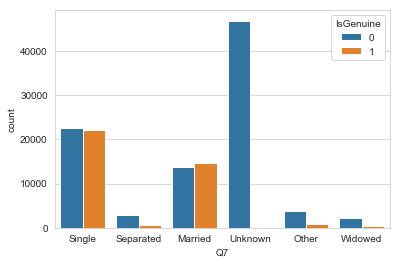

In [112]:
# Q7 Vs Genuiness
sns.countplot(x="Q7", hue="IsGenuine", data=survey_df)

In [113]:
round(survey_df[survey_df['IsGenuine'] == 1].Q7.value_counts()/survey_df['Q7'].value_counts(),2)

Married      0.52
Other        0.17
Separated    0.19
Single       0.50
Unknown       NaN
Widowed      0.15
Name: Q7, dtype: float64

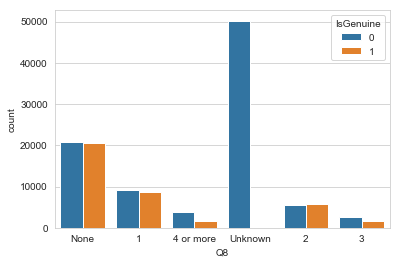

In [114]:
# Q8 Vs Genuiness
sns.countplot(x="Q8", hue="IsGenuine", data=survey_df)

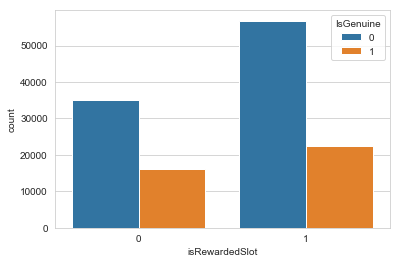

In [115]:
# isRewardedSlot Vs Genuiness
sns.countplot(x="isRewardedSlot", hue="IsGenuine", data=survey_df)

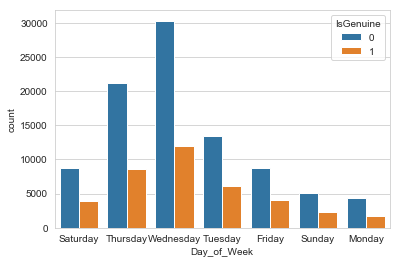

In [116]:
# Day of week Vs Genuiness
sns.countplot(x="Day_of_Week", hue="IsGenuine", data=survey_df)

In [117]:
round(survey_df[survey_df['IsGenuine'] == 1].Day_of_Week.value_counts()/survey_df['Day_of_Week'].value_counts(),2)

Wednesday    0.28
Thursday     0.29
Tuesday      0.31
Friday       0.32
Saturday     0.31
Sunday       0.31
Monday       0.28
Name: Day_of_Week, dtype: float64

### Hypothesis Tests

In [ ]:
# Numerical variables

##### Compute the Wilcoxon rank-sum statistic for two samples.

The Wilcoxon rank-sum test tests the null hypothesis that two sets of measurements are drawn from the same distribution. The alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample.

This test should be used to compare two samples from continuous distributions. It does not handle ties between measurements in x and y.

Questions Answered:
Is Time variables are different from genuine and non genuine response?

H0: Sample means are equal
H1: Sample means are different


In [134]:
from scipy import stats
#s, p = stats.ranksums(survey_df['T1_Actual'], survey_df['IsGenuine'])
s = []
p = []
for col in time_cols:
    st, pval = stats.ranksums(survey_df[col], survey_df['IsGenuine'])    
    s.append(st)
    p.append(pval)
 

In [138]:
hyp_test = pd.DataFrame({"Feature": time_cols,
                        "stat": s,
                        "p_value":p})
hyp_test

,Feature,stat,p_value
0,T1_Actual,422.047815,0.0
1,T2_Actual,418.437449,0.0
2,T3_Actual,418.869719,0.0
3,T4_Actual,418.545376,0.0
4,T5_Actual,418.047104,0.0
5,T6_Actual,415.239678,0.0
6,T7_Actual,410.208940,0.0
7,T8_Actual,415.794596,0.0
8,T9_Actual,415.754840,0.0
9,Total_time,429.544862,0.0


### The p value of all the numerical features as statistically significant. Hence reject the null hypothesis. Henc, mean time for genuine and non-genuine responses are not same


In [ ]:
### Chisquare test of independence for categorical variables

In [299]:
#H0: There is no relationship between completness and Genuiness
crosstab = pd.crosstab(survey_df['isComplete'], survey_df['IsGenuine'])
crosstab

IsGenuine,0,1
isComplete,,
0,56536,0
1,37291,36801


In [300]:
stats.chi2_contingency(crosstab)

(39092.60037553833, 0.0, 1, array([[40608.47040451, 15927.52959549],
        [53218.52959549, 20873.47040451]]))

#### We can reject the null hypothesis as the p-value(0.0) is less than 0.05. Thus, the results indicate that there is a relationship between thest variables

In [139]:
## Check the data set to validate the actual genuiness. 

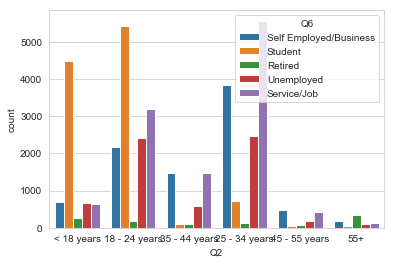

In [140]:
sns.countplot(x="Q2", hue="Q6", data=survey_df[survey_df['IsGenuine'] == 1])

## From the above graph it can be noticed that many people who are aged less than 18 years  are retired which indicate that they are not genuine. Hence we can mark as not genuine.

In [141]:
survey_df[['Q2','Q6','IsGenuine']].query('Q2 == "< 18 years"').query('Q6 == "Retired"').query('IsGenuine == 1')

,Q2,Q6,IsGenuine
76,< 18 years,Retired,1
1173,< 18 years,Retired,1
1206,< 18 years,Retired,1
1225,< 18 years,Retired,1
2291,< 18 years,Retired,1
2763,< 18 years,Retired,1
3031,< 18 years,Retired,1
3237,< 18 years,Retired,1
3420,< 18 years,Retired,1
3482,< 18 years,Retired,1


In [142]:
# Set these records as not genuine
survey_df.loc[(survey_df.Q2 == "< 18 years")&(survey_df.Q6 == "Retired"),'IsGenuine'] = 0 
validation_df.loc[(validation_df.Q2 == "< 18 years")&(validation_df.Q6 == "Retired"),'IsGenuine'] = 0 

In [143]:
survey_df[['Q2','Q6','IsGenuine']].query('Q2 == "< 18 years"').query('Q6 == "Retired"').query('IsGenuine == 1')

,Q2,Q6,IsGenuine


In [144]:
validation_df[['Q2','Q6','IsGenuine']].query('Q2 == "< 18 years"').query('Q6 == "Retired"').query('IsGenuine == 1')

,Q2,Q6,IsGenuine


In [145]:
survey_df['IsGenuine'].value_counts()

0    92243
1    38385
Name: IsGenuine, dtype: int64

In [146]:
## Compare Q2 with Q7

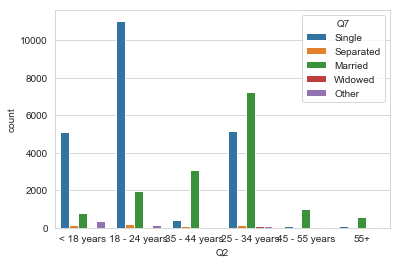

In [147]:
sns.countplot(x="Q2", hue="Q7", data=survey_df[survey_df['IsGenuine'] == 1])

In [148]:
## There are age group <18 years with widowed and separated as Genuine. We can consider them as non-Genuine

In [149]:
survey_df[['Q2','Q7','IsGenuine']].query('Q2 == "< 18 years"').query('Q7 == "Widowed"').query('IsGenuine == 1')

,Q2,Q7,IsGenuine
2687,< 18 years,Widowed,1
5305,< 18 years,Widowed,1
5521,< 18 years,Widowed,1
6780,< 18 years,Widowed,1
7156,< 18 years,Widowed,1
7693,< 18 years,Widowed,1
9279,< 18 years,Widowed,1
9689,< 18 years,Widowed,1
15930,< 18 years,Widowed,1
16124,< 18 years,Widowed,1


In [150]:
# Set these records as not genuine
survey_df.loc[(survey_df.Q2 == "< 18 years")&(survey_df.Q7 == "Widowed"),'IsGenuine'] = 0 

validation_df.loc[(validation_df.Q2 == "< 18 years")&(validation_df.Q7 == "Widowed"),'IsGenuine'] = 0 

In [151]:
survey_df[['Q2','Q7','IsGenuine']].query('Q2 == "< 18 years"').query('Q7 == "Widowed"').query('IsGenuine == 1')

,Q2,Q7,IsGenuine


In [152]:
survey_df['IsGenuine'].value_counts()

0    92311
1    38317
Name: IsGenuine, dtype: int64

In [153]:
survey_df[['Q2','Q7','IsGenuine']].query('Q2 == "< 18 years"').query('Q7 == "Separated"').query('IsGenuine == 1')

,Q2,Q7,IsGenuine
1105,< 18 years,Separated,1
2214,< 18 years,Separated,1
2766,< 18 years,Separated,1
3016,< 18 years,Separated,1
3119,< 18 years,Separated,1
4628,< 18 years,Separated,1
4831,< 18 years,Separated,1
6005,< 18 years,Separated,1
8049,< 18 years,Separated,1
8059,< 18 years,Separated,1


In [154]:
# Set these records as not genuine
survey_df.loc[(survey_df.Q2 == "< 18 years")&(survey_df.Q7 == "Separated"),'IsGenuine'] = 0 
validation_df.loc[(validation_df.Q2 == "< 18 years")&(validation_df.Q7 == "Separated"),'IsGenuine'] = 0 

In [155]:
survey_df[['Q2','Q7','IsGenuine']].query('Q2 == "< 18 years"').query('Q7 == "Separated"').query('IsGenuine == 1')

,Q2,Q7,IsGenuine


In [156]:
survey_df['IsGenuine'].value_counts()

0    92481
1    38147
Name: IsGenuine, dtype: int64

## Note: There are 9 questions so to answer them , atleast 9seconds required. there are records marked as genuine with time <9 seconds. hence, mark those records as non-genuine.

In [157]:
survey_df.loc[survey_df.Total_time <=9 , 'IsGenuine'] = 0
validation_df.loc[validation_df.Total_time <=9 , 'IsGenuine'] = 0

In [158]:
survey_df['IsGenuine'].value_counts()

0    93827
1    36801
Name: IsGenuine, dtype: int64

In [159]:
## SWrite the cleaned data to .csv file
#survey_df.to_csv("InMobi_Survey_Cleaned_New")

## Check the correlation between variables

In [160]:
# Correlation matrix between numerical values and IsGenuine 
numcols = time_cols
numcols.append('IsGenuine')

In [161]:
numcols

['T1_Actual',
 'T2_Actual',
 'T3_Actual',
 'T4_Actual',
 'T5_Actual',
 'T6_Actual',
 'T7_Actual',
 'T8_Actual',
 'T9_Actual',
 'Total_time',
 'IsGenuine']

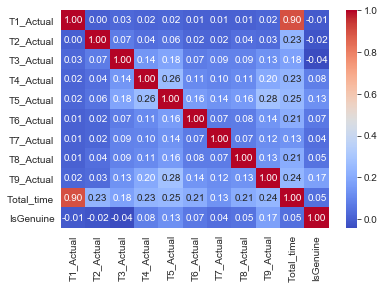

In [162]:
# Correlation matrix between numerical values and IsGenuine
sns.heatmap(survey_df[numcols].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")


In [163]:
time_cols = ['T1_Actual', 'T2_Actual', 'T3_Actual','T4_Actual', 'T5_Actual', 'T6_Actual', 'T7_Actual', 'T8_Actual', 'T9_Actual','Total_time']

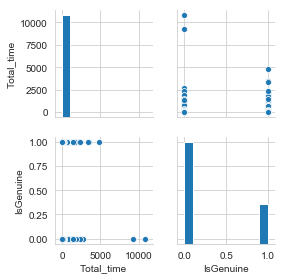

In [164]:
# pairplot of time variables T1 to T9
sns.pairplot(survey_df[['Total_time', 'IsGenuine']],size=2)

In [165]:
survey_df.shape, validation_df.shape

((130628, 29), (64340, 29))

In [166]:
time_cols

['T1_Actual',
 'T2_Actual',
 'T3_Actual',
 'T4_Actual',
 'T5_Actual',
 'T6_Actual',
 'T7_Actual',
 'T8_Actual',
 'T9_Actual',
 'Total_time']

### Create Dummies for categorical variables

In [167]:
# find the categorical columns
catg_cols= []
for col in survey_df:
        if(survey_df[col].dtype == 'O'):            
            catg_cols.append(col)

In [168]:
catg_cols

['connection',
 'gyro_start',
 'gyro_end',
 'time',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Day_of_Week']

In [169]:
## Drop Q9 as it is a bogus question and doesnot have any information related to customer behaviour.

In [170]:
catg_cols.remove('Q9')
catg_cols.remove('time')

In [171]:
survey_df2 = pd.DataFrame()
survey_df2 = survey_df.drop(columns=['time','Q9'])

validation_df = validation_df.drop(columns=['time','Q9'])

In [172]:
survey_df2.shape, validation_df.shape

((130628, 27), (64340, 27))

In [173]:
survey_df2.columns

Index(['connection', 'gyro_start', 'gyro_end', 'Q1', 'T1_Actual', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'isRewardedSlot', 'isComplete',
       'isFirstBogusCorrect', 'isSecondBogusCorrect', 'T2_Actual', 'T3_Actual',
       'T4_Actual', 'T5_Actual', 'T6_Actual', 'T7_Actual', 'T8_Actual',
       'T9_Actual', 'Total_time', 'Day_of_Week', 'IsGenuine'],
      dtype='object')

In [174]:
# Create Dummies
survey_df2= pd.get_dummies(survey_df2, prefix=catg_cols, prefix_sep='_dummy_' , columns=catg_cols, drop_first=True)

In [175]:
validation_df= pd.get_dummies(validation_df, prefix=catg_cols, prefix_sep='_dummy_' , columns=catg_cols, drop_first=True)

In [176]:
survey_df2.head()

,T1_Actual,isRewardedSlot,isComplete,isFirstBogusCorrect,isSecondBogusCorrect,T2_Actual,T3_Actual,T4_Actual,T5_Actual,T6_Actual,...,Q8_dummy_3,Q8_dummy_4 or more,Q8_dummy_None,Q8_dummy_Unknown,Day_of_Week_dummy_Monday,Day_of_Week_dummy_Saturday,Day_of_Week_dummy_Sunday,Day_of_Week_dummy_Thursday,Day_of_Week_dummy_Tuesday,Day_of_Week_dummy_Wednesday
0,16,0,1,1,1,4.0,3.0,2.000000,4.000000,4.000000,...,0,0,1,0,0,1,0,0,0,0
1,9,0,1,1,1,6.0,3.0,11.000000,5.000000,2.000000,...,0,0,0,0,0,1,0,0,0,0
2,1,1,1,1,1,1.0,1.0,1.000000,0.000000,1.000000,...,0,0,0,0,0,0,0,1,0,0
3,5,1,1,0,1,2.0,2.0,2.000000,8.000000,4.000000,...,0,1,0,0,0,0,0,0,0,1
4,9,1,0,1,0,5.0,8.0,6.093212,6.417945,4.491604,...,0,0,0,1,0,0,0,1,0,0


In [177]:
survey_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130628 entries, 0 to 130627
Data columns (total 75 columns):
T1_Actual                                                                130628 non-null int64
isRewardedSlot                                                           130628 non-null int64
isComplete                                                               130628 non-null int64
isFirstBogusCorrect                                                      130628 non-null int64
isSecondBogusCorrect                                                     130628 non-null int64
T2_Actual                                                                130628 non-null float64
T3_Actual                                                                130628 non-null float64
T4_Actual                                                                130628 non-null float64
T5_Actual                                                                130628 non-null float64
T6_Actual                      

In [178]:
validation_df.head()

,T1_Actual,isRewardedSlot,isComplete,isFirstBogusCorrect,isSecondBogusCorrect,T2_Actual,T3_Actual,T4_Actual,T5_Actual,T6_Actual,...,Q8_dummy_3,Q8_dummy_4 or more,Q8_dummy_None,Q8_dummy_Unknown,Day_of_Week_dummy_Monday,Day_of_Week_dummy_Saturday,Day_of_Week_dummy_Sunday,Day_of_Week_dummy_Thursday,Day_of_Week_dummy_Tuesday,Day_of_Week_dummy_Wednesday
0,12,1,0,0,0,5.0,4.000000,6.000000,6.373346,4.394688,...,0,0,0,1,0,0,0,0,0,1
1,2,1,1,0,1,5.0,1.000000,2.000000,5.000000,2.000000,...,0,0,0,0,0,0,0,1,0,0
2,4,0,1,1,1,3.0,9.000000,25.000000,8.000000,5.000000,...,1,0,0,0,0,1,0,0,0,0
3,7,1,0,0,0,9.0,3.684849,6.006719,6.373346,4.394688,...,0,0,0,1,0,0,0,0,0,1
4,12,0,0,0,0,5.0,4.000000,6.006719,6.373346,4.394688,...,0,0,0,1,0,0,0,0,1,0


### Check for all zero columns as they don't carry any information

In [179]:
def get_cols(df):    
    col_list = []
    all_cols = df.columns    
    for col in all_cols:
        if(df[col].dtype != 'O'):              
            if((df[col] == 0).sum() == len(df)):
                col_list.append(col)        
    return col_list
        

In [180]:
get_cols(survey_df2)

[]

In [181]:
len(time_cols)

10

## Standardize the numeric columns

In [182]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
scaler = StandardScaler()
X1 = np.array(survey_df2[time_cols]).reshape(-10, 10)
survey_df2[time_cols] = scaler.fit_transform( X1)

In [183]:
X1.shape

(130628, 10)

In [184]:
X2 = np.array(validation_df[time_cols]).reshape(-10, 10)
validation_df[time_cols] = scaler.fit_transform( X2)

In [185]:
survey_df2.head()

,T1_Actual,isRewardedSlot,isComplete,isFirstBogusCorrect,isSecondBogusCorrect,T2_Actual,T3_Actual,T4_Actual,T5_Actual,T6_Actual,...,Q8_dummy_3,Q8_dummy_4 or more,Q8_dummy_None,Q8_dummy_Unknown,Day_of_Week_dummy_Monday,Day_of_Week_dummy_Saturday,Day_of_Week_dummy_Sunday,Day_of_Week_dummy_Thursday,Day_of_Week_dummy_Tuesday,Day_of_Week_dummy_Wednesday
0,0.127039,0,1,1,1,-0.015744,-0.207990,-6.655836e-01,-4.713024e-01,-6.692924e-02,...,0,0,1,0,0,1,0,0,0,0
1,-0.023109,0,1,1,1,0.172187,-0.207990,7.978764e-01,-2.763838e-01,-3.392187e-01,...,0,0,0,0,0,1,0,0,0,0
2,-0.194706,1,1,1,1,-0.297640,-0.839144,-8.281902e-01,-1.250977e+00,-4.753635e-01,...,0,0,0,0,0,0,0,1,0,0
3,-0.108907,1,1,0,1,-0.203674,-0.523567,-6.655836e-01,3.083720e-01,-6.692924e-02,...,0,1,0,0,0,0,0,0,0,1
4,-0.023109,1,0,1,0,0.078222,1.369894,-1.444237e-16,-1.731225e-16,1.209208e-16,...,0,0,0,1,0,0,0,1,0,0


In [186]:
validation_df.head(2)

,T1_Actual,isRewardedSlot,isComplete,isFirstBogusCorrect,isSecondBogusCorrect,T2_Actual,T3_Actual,T4_Actual,T5_Actual,T6_Actual,...,Q8_dummy_3,Q8_dummy_4 or more,Q8_dummy_None,Q8_dummy_Unknown,Day_of_Week_dummy_Monday,Day_of_Week_dummy_Saturday,Day_of_Week_dummy_Sunday,Day_of_Week_dummy_Thursday,Day_of_Week_dummy_Tuesday,Day_of_Week_dummy_Wednesday
0,0.000572,1,0,0,0,0.161881,0.065959,-0.001582,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,1
1,-0.025550,1,1,0,1,0.161881,-0.561920,-0.943435,-0.274099,-0.722722,...,0,0,0,0,0,0,0,1,0,0


In [187]:
df = survey_df2.drop(columns='IsGenuine')
corr = df.corr()

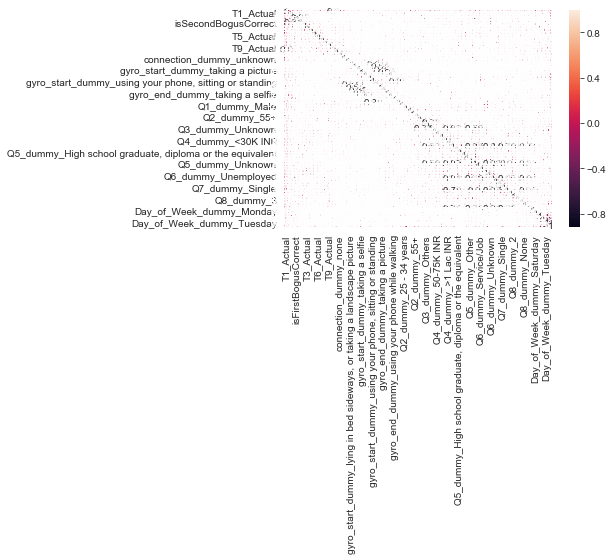

In [188]:
sns.heatmap(corr, annot=True)

### Compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [189]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
X_Features = df[selected_columns]

In [190]:
X_Features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130628 entries, 0 to 130627
Data columns (total 69 columns):
T1_Actual                                                                130628 non-null float64
isRewardedSlot                                                           130628 non-null int64
isComplete                                                               130628 non-null int64
isFirstBogusCorrect                                                      130628 non-null int64
isSecondBogusCorrect                                                     130628 non-null int64
T2_Actual                                                                130628 non-null float64
T3_Actual                                                                130628 non-null float64
T4_Actual                                                                130628 non-null float64
T5_Actual                                                                130628 non-null float64
T6_Actual                    

## Check Data set balance

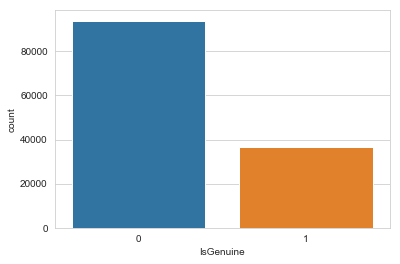

In [191]:
sns.set_style('whitegrid')
sns.countplot(x = 'IsGenuine', data = survey_df2)

### Hypothesis Test: 
### Only 30% of the given data set has the Genuine records. 

In [192]:
Sample = survey_df2["IsGenuine"].sample(500)

In [193]:
Sample[Sample == 1].count()

155

In [194]:
ob_freq = [Sample[Sample == 1].count(), (500-Sample[Sample == 1].count())]
exp_freq = [500 * 0.30, 500 * 0.70 ]
print(exp_freq)

[150.0, 350.0]


In [195]:
ob_freq

[155, 345]

In [196]:
stats.chisquare(ob_freq, exp_freq)

Power_divergenceResult(statistic=0.23809523809523808, pvalue=0.6255852315243251)

# The pval is >0.05 indicate that the claim is true , that is Only 30% of the given data set has the Genuine records. 

## Note: It is an unbalanced data set. Need to do sampling to get a balanced data set for training the models

## Set X and Y and Split Data set as training and test set

In [197]:
X = X_Features
Y = survey_df2['IsGenuine']

In [198]:
Y.value_counts()

0    93827
1    36801
Name: IsGenuine, dtype: int64

In [199]:
X_Validation = validation_df[X_Features.columns]
y_Validation = validation_df['IsGenuine']

In [200]:
X= X.drop(columns=['isFirstBogusCorrect', 'isSecondBogusCorrect'])

In [201]:
X_Validation= X_Validation.drop(columns=['isFirstBogusCorrect', 'isSecondBogusCorrect'])

In [202]:
X.shape, Y.shape

((130628, 67), (130628,))

In [203]:
X_Validation.shape, y_Validation.shape

((64340, 67), (64340,))

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [205]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((87520, 67), (43108, 67), (87520,), (43108,))

## Sampling using SMOTE

In [206]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (87520, 67)
Number transactions y_train dataset:  (87520,)
Number transactions X_test dataset:  (43108, 67)
Number transactions y_test dataset:  (43108,)


In [207]:
print("Before Sampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before Sampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before Sampling, counts of label '1': 24652
Before Sampling, counts of label '0': 62868 



In [208]:
y_train.head()

102752    1
37786     1
26317     1
48058     0
59271     0
Name: IsGenuine, dtype: int64

In [209]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2, k_neighbors = 3)
X_train_sampled, y_train_sampled = sm.fit_sample(X_train, y_train.ravel())

In [210]:
print('After Sampling, the shape of train_X: {}'.format(X_train_sampled.shape))
print('After Sampling, the shape of train_y: {} \n'.format(y_train_sampled.shape))

print("After Sampling, counts of label '1': {}".format(sum(y_train_sampled==1)))
print("After Sampling, counts of label '0': {}".format(sum(y_train_sampled==0)))

After Sampling, the shape of train_X: (125736, 67)
After Sampling, the shape of train_y: (125736,) 

After Sampling, counts of label '1': 62868
After Sampling, counts of label '0': 62868


In [211]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (87520, 67)
Number transactions y_train dataset:  (87520,)
Number transactions X_test dataset:  (43108, 67)
Number transactions y_test dataset:  (43108,)


In [212]:
np.bincount(y_train_sampled)

array([62868, 62868], dtype=int64)

In [213]:
# Append Column names and convert ndarray to Data frame
df = pd.DataFrame(X_train_sampled)
col_list = X_train.columns
df.columns=col_list
X_train_sampled = df

In [214]:
# Set X_train and y_train with samples data
X_train = X_train_sampled
y_train = y_train_sampled

In [215]:
X_train.shape, y_train.shape

((125736, 67), (125736,))

In [216]:
X_train.columns

Index(['T1_Actual', 'isRewardedSlot', 'isComplete', 'T2_Actual', 'T3_Actual',
       'T4_Actual', 'T5_Actual', 'T6_Actual', 'T7_Actual', 'T8_Actual',
       'T9_Actual', 'Total_time', 'connection_dummy_cellular',
       'connection_dummy_none', 'connection_dummy_unknown',
       'gyro_start_dummy_lying in bed sideways, or taking a landscape picture',
       'gyro_start_dummy_lying on your back, with your phone up',
       'gyro_start_dummy_taking a picture', 'gyro_start_dummy_taking a selfie',
       'gyro_start_dummy_using the phone on a table',
       'gyro_start_dummy_using your phone while walking',
       'gyro_start_dummy_using your phone, sitting or standing',
       'gyro_end_dummy_lying in bed sideways, or taking a landscape picture',
       'gyro_end_dummy_lying on your back, with your phone up',
       'gyro_end_dummy_taking a picture', 'gyro_end_dummy_taking a selfie',
       'gyro_end_dummy_using your phone while walking',
       'gyro_end_dummy_using your phone, sitting o

## Logistic Regression Model using stat package

#### The cut off probability is same for both Yuden's index(0.49) and cost-based approach (0.49)

## Model Building

### ADVANCED REGRESSION MODELS

### SelectKBest Feature Selection. It uses the ANOVA statistical test for  features to select 20 of the best features.

In [217]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
names = X_train.columns
kbest = []
# feature extraction
test = SelectKBest(score_func =f_classif, k=20)
X_new = test.fit(X_train, y_train)
outcome = X_new.get_support()
for i in range(0,len(names)):
    if outcome[i]:
        kbest.append(names[i])
        print(names[i])
print(X_new.scores_)
# Set X train and X test with selected features
X_train_Kbest = X_train[kbest]
X_test_Kbest = X_test[kbest]

isComplete
T5_Actual
T9_Actual
Q2_dummy_25 - 34 years
Q2_dummy_< 18 years
Q2_dummy_Unknown
Q3_dummy_Others
Q3_dummy_Unknown
Q3_dummy_iOS
Q4_dummy_<30K INR
Q4_dummy_Unknown
Q5_dummy_High school graduate, diploma or the equivalent
Q5_dummy_Masterâ€™s/Professional degree
Q5_dummy_Unknown
Q6_dummy_Self Employed/Business
Q6_dummy_Service/Job
Q6_dummy_Student
Q7_dummy_Single
Q8_dummy_2
Q8_dummy_None
[1.47851103e+01 1.12245447e+02 9.57652519e+04 4.09300574e+02
 4.78390503e+02 9.47309551e+02 2.15191575e+03 4.39812272e+02
 1.31148668e+02 3.26799246e+02 4.42128898e+03 2.51508530e+02
 2.87169945e+01 2.92765429e+01 4.34883665e+02 3.85544957e+01
 1.26006382e+01 1.05862773e+02 1.04573700e+02 7.06956564e+02
 3.13664989e+02 1.40805409e+03 3.03673589e+01 7.61858903e+00
 8.60698126e+01 9.05107178e+01 7.92242701e+02 1.52580206e+03
 2.03650703e+02 2.37299870e+03 9.04241055e+01 9.11287322e+00
 4.73452190e+02 2.76301505e+03 7.29174172e+03 1.20301491e+04
 1.43237847e+04 5.58808099e+03 1.18726996e+01 5.474333

In [218]:
X_train.columns

Index(['T1_Actual', 'isRewardedSlot', 'isComplete', 'T2_Actual', 'T3_Actual',
       'T4_Actual', 'T5_Actual', 'T6_Actual', 'T7_Actual', 'T8_Actual',
       'T9_Actual', 'Total_time', 'connection_dummy_cellular',
       'connection_dummy_none', 'connection_dummy_unknown',
       'gyro_start_dummy_lying in bed sideways, or taking a landscape picture',
       'gyro_start_dummy_lying on your back, with your phone up',
       'gyro_start_dummy_taking a picture', 'gyro_start_dummy_taking a selfie',
       'gyro_start_dummy_using the phone on a table',
       'gyro_start_dummy_using your phone while walking',
       'gyro_start_dummy_using your phone, sitting or standing',
       'gyro_end_dummy_lying in bed sideways, or taking a landscape picture',
       'gyro_end_dummy_lying on your back, with your phone up',
       'gyro_end_dummy_taking a picture', 'gyro_end_dummy_taking a selfie',
       'gyro_end_dummy_using your phone while walking',
       'gyro_end_dummy_using your phone, sitting o

### Random Forest Feature Selection

In [219]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False,
        threshold='1.25*median')

In [220]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

30 selected features


In [221]:
embeded_rf_feature

['T1_Actual',
 'isRewardedSlot',
 'isComplete',
 'T2_Actual',
 'T3_Actual',
 'T4_Actual',
 'T5_Actual',
 'T6_Actual',
 'T7_Actual',
 'T8_Actual',
 'T9_Actual',
 'Total_time',
 'Q1_dummy_Male',
 'Q2_dummy_25 - 34 years',
 'Q2_dummy_< 18 years',
 'Q3_dummy_Others',
 'Q3_dummy_Unknown',
 'Q3_dummy_iOS',
 'Q4_dummy_<30K INR',
 'Q4_dummy_Unknown',
 'Q5_dummy_High school graduate, diploma or the equivalent',
 'Q5_dummy_No schooling completed',
 'Q5_dummy_Other',
 'Q5_dummy_Unknown',
 'Q6_dummy_Self Employed/Business',
 'Q6_dummy_Service/Job',
 'Q6_dummy_Student',
 'Q7_dummy_Single',
 'Q8_dummy_None',
 'Day_of_Week_dummy_Wednesday']

In [222]:
# Set X train and X test with selected features
X_train_RF = X_train[embeded_rf_feature]
X_test_RF =X_test[embeded_rf_feature]

In [223]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
cross_val_score(LogisticRegression(), X_train_RF, y_train, scoring='neg_log_loss').mean()


-0.28399770488693

In [224]:
cross_val_score(LogisticRegression(), X_train_Kbest, y_train, scoring='neg_log_loss').mean()

-0.28957510176008233

In [232]:
print("Select KBest F1 score:", cross_val_score(LogisticRegression(), X_train_Kbest, y_train, scoring='f1').mean())
print("Select RF F1 score:", cross_val_score(LogisticRegression(), X_train_RF, y_train, scoring='f1').mean())

Select KBest F1 score: 0.8954167655649465
Select RF F1 score: 0.8965482434174016


#### The F1 score is same for both feature lists. Hence, selected KBest features as it has less number of features

# Model Building

In [234]:
## Selected KBest Features for Modelling as its F1 score is good compared to RF Features
#X_train = X_train_RF
#X_test = X_test_RF
X_train = X_train_Kbest
X_test = X_test_Kbest


In [235]:
# Define a function to predict score using different models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

def get_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # Cross validation
    cv_scores = cross_val_score(model, X_train, y_train, cv =5, scoring ='f1')
    print("\nCross Validation Scores:\n")
    print(cv_scores)
    
    # Predict on training set
    y_pred = model.predict(X_test)   
    print("\nAccuracy: ", accuracy_score(y_test, y_pred))    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred, [1,0])
    #print(cm)
    
    sns.heatmap(cm, annot=True, fmt=' .2f', xticklabels= ["Genuine", "Not Genuine"],
               yticklabels= ["Genuine", "Not Genuine"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    print("\n Precision, Recall and Support:")  
    print(classification_report(y_true=y_test, y_pred=y_pred))
    # predict probabilities
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    y_pred_sample_score = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
    roc_auc = auc(fpr,tpr) 
    print('\nAUC : = %0.3f'% roc_auc )
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color='orange', label='AUC = %0.3f'% roc_auc)    
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    return model, cv_scores

### 1. Logistic Regression Model

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [237]:
# Logistic regression in train set
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
accuracy_score(y_train, y_pred)

0.8835735191194248

In [238]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_train, y_pred)
print(cm)
    
#sns.heatmap(cm)
print("\n Precision, Recall and Support:")  
print(classification_report(y_true=y_train, y_pred=y_pred))


Confusion Matrix:
[[48336 14532]
 [  107 62761]]

 Precision, Recall and Support:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     62868
           1       0.81      1.00      0.90     62868

   micro avg       0.88      0.88      0.88    125736
   macro avg       0.90      0.88      0.88    125736
weighted avg       0.90      0.88      0.88    125736




Cross Validation Scores:

[0.89827049 0.89669466 0.89403219 0.89603483 0.8923711 ]

Accuracy:  0.8297995731650738

Confusion Matrix:


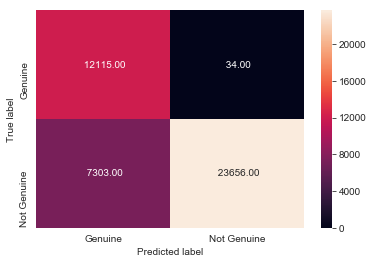


 Precision, Recall and Support:
              precision    recall  f1-score   support

           0       1.00      0.76      0.87     30959
           1       0.62      1.00      0.77     12149

   micro avg       0.83      0.83      0.83     43108
   macro avg       0.81      0.88      0.82     43108
weighted avg       0.89      0.83      0.84     43108


AUC : = 0.911


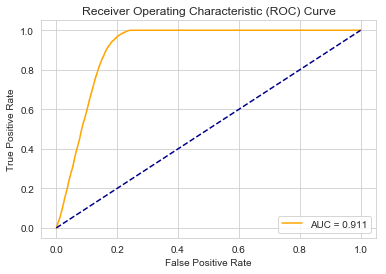

In [239]:
# Logistic Regression prediction on Test set 
from sklearn.metrics import roc_curve , auc
lr_model, cv_scores_lr = get_model(LogisticRegression(), X_train, X_test, y_train, y_test )

## The Logistic Regression gives F1- score for non genuine observations is 87% with Specificity (True negative rate) 78%. 

## Hyper Parameter Tuning

In [240]:
# Hyper Parameter turning
from sklearn.model_selection import GridSearchCV


Cross Validation Scores:

[0.89833483 0.8967267  0.89409586 0.89613078 0.89243453]

Accuracy:  0.8298227707154124

Confusion Matrix:


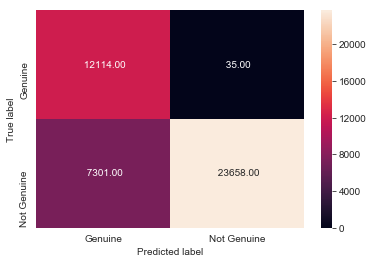


 Precision, Recall and Support:
              precision    recall  f1-score   support

           0       1.00      0.76      0.87     30959
           1       0.62      1.00      0.77     12149

   micro avg       0.83      0.83      0.83     43108
   macro avg       0.81      0.88      0.82     43108
weighted avg       0.89      0.83      0.84     43108


AUC : = 0.911


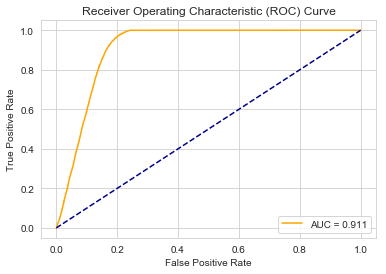

In [241]:
# Logistic Regression with tuned parameters
from sklearn.metrics import roc_curve , auc
logreg, cv_scores_lr = get_model(LogisticRegression(C=100, penalty='l1', tol= 0.0001, intercept_scaling = 1,
                                    max_iter= 100 ), X_train, X_test, y_train, y_test )

## The Logistic Regression gives F1- score for non genuine observations is 87% with Specificity (True negative rate) 78%. 

In [242]:
### Cross Validation Scores

In [243]:
def modelVal(scores, n_folds=5, plot = True):
    ''' Validate the model using cross validation'''
    
    #Print model report:
    print("\nModel Report: ")
    print('Model score error with cv : Mean - {:.4f} | Stdf - {:.4f}'.format(scores.mean(), scores.std()))
    if plot:
        plt.plot(range(0, n_folds), scores)
        plt.xlabel("Iteration")
        plt.ylabel("Scoring")
        plt.title("Cross-Validation scores")
        plt.show()


Model Report: 
Model score error with cv : Mean - 0.8955 | Stdf - 0.0021


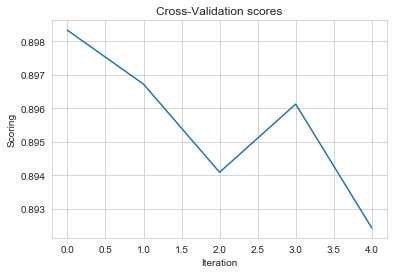

In [244]:
modelVal(cv_scores_lr,n_folds=5, plot = True)

In [245]:
import scikitplot as skplt

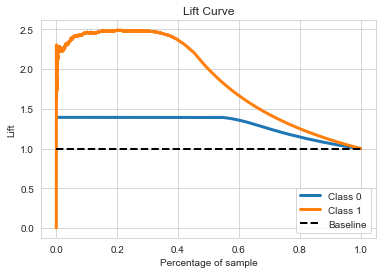

In [246]:
# Lift curve for logistic regression
lr_probas = logreg.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, lr_probas)

In [247]:
logreg.intercept_

array([-7.88216288])

In [248]:
logreg.coef_

array([[  8.81157707,   0.15887865,   0.39701425,   0.17402268,
         -0.58831877,   0.        , -14.72313566,   0.        ,
        -13.89846566,   0.13390708,   0.        ,  -0.0543675 ,
          0.66567114,  -6.78096494,   0.13296299,   0.2523734 ,
          0.33274559,   0.37807493,   0.17316931,  -0.07901922]])

In [249]:
probs = logreg.predict_proba(X_test)
probs

array([[8.44426008e-02, 9.15557399e-01],
       [9.99542883e-01, 4.57116581e-04],
       [9.99993731e-01, 6.26943301e-06],
       ...,
       [9.99999762e-01, 2.37892531e-07],
       [4.84806735e-01, 5.15193265e-01],
       [2.96130125e-01, 7.03869875e-01]])

In [250]:
X_features = X_train.columns

In [251]:
dict(zip(X_features, logreg.coef_[0]))

{'isComplete': 8.811577067254934,
 'T5_Actual': 0.15887865187841577,
 'T9_Actual': 0.39701424700788657,
 'Q2_dummy_25 - 34 years': 0.17402267528824775,
 'Q2_dummy_< 18 years': -0.588318765244522,
 'Q2_dummy_Unknown': 0.0,
 'Q3_dummy_Others': -14.723135662837468,
 'Q3_dummy_Unknown': 0.0,
 'Q3_dummy_iOS': -13.898465658239113,
 'Q4_dummy_<30K INR': 0.13390708259445247,
 'Q4_dummy_Unknown': 0.0,
 'Q5_dummy_High school graduate, diploma or the equivalent': -0.054367496530811486,
 'Q5_dummy_Masterâ€™s/Professional degree': 0.6656711369108138,
 'Q5_dummy_Unknown': -6.780964936679025,
 'Q6_dummy_Self Employed/Business': 0.13296298623371916,
 'Q6_dummy_Service/Job': 0.2523734025992778,
 'Q6_dummy_Student': 0.3327455886607871,
 'Q7_dummy_Single': 0.3780749308628015,
 'Q8_dummy_2': 0.17316931410428388,
 'Q8_dummy_None': -0.07901922027419839}

In [252]:
# Create a coefficient matrix for the  model
coeff_LR = pd.DataFrame()
coeff_LR['Features'] = X_train.columns
coeff_LR['Coef(β)'] = pd.DataFrame(logreg.coef_).T

In [253]:
coeff_LR.sort_values(by= 'Coef(β)', ascending=False, inplace=True)

In [254]:
coeff_LR

,Features,Coef(β)
0,isComplete,8.811577
12,Q5_dummy_Masterâ€™s/Professional degree,0.665671
2,T9_Actual,0.397014
17,Q7_dummy_Single,0.378075
16,Q6_dummy_Student,0.332746
15,Q6_dummy_Service/Job,0.252373
3,Q2_dummy_25 - 34 years,0.174023
18,Q8_dummy_2,0.173169
1,T5_Actual,0.158879
9,Q4_dummy_<30K INR,0.133907


Text(0, 0.5, 'Features')

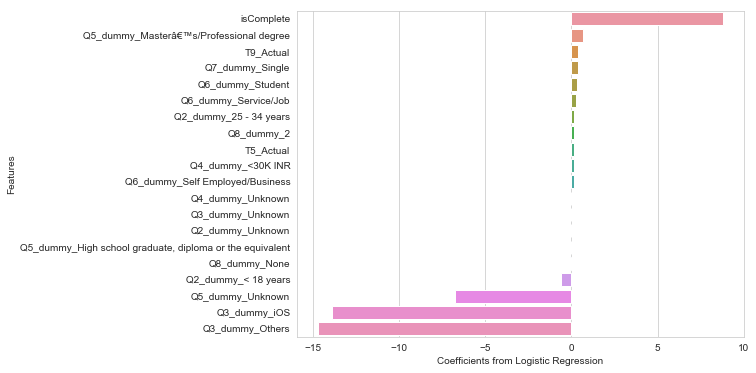

In [255]:
plt.figure(figsize=(8,6))
sns.barplot(x='Coef(β)', y='Features', data= coeff_LR );
plt.xlabel("Coefficients from Logistic Regression")
plt.ylabel("Features")

In [256]:
## Predicting on Test data
y_pred_df_LR = pd.DataFrame({"actual": y_test,
                          "predicted":logreg.predict(X_test),
                          "predicted_prob": probs[:, 1]})

In [257]:
y_pred_df_LR.sample(10)

,actual,predicted,predicted_prob
40530,0,0,5.098722e-07
57347,0,0,8.097156e-04
41612,1,1,7.892009e-01
22582,0,0,2.378925e-07
57653,0,1,7.710777e-01
7029,0,0,4.284344e-07
17666,0,0,4.284344e-07
64031,1,1,7.823715e-01
50987,0,0,4.284344e-07
17549,1,0,4.248433e-01


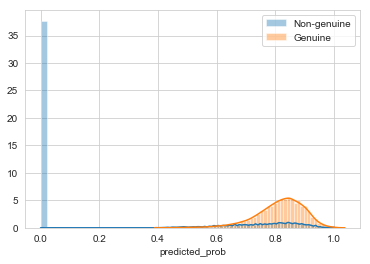

In [258]:
sns.distplot( y_pred_df_LR[y_pred_df_LR.actual == 0]['predicted_prob'], label = 'Non-genuine')
sns.distplot( y_pred_df_LR[y_pred_df_LR.actual == 1]['predicted_prob'], label = 'Genuine')
plt.legend()

## 2. Decision Tree Classification


Cross Validation Scores:

[0.89 0.89 0.9  0.9  0.9 ]

Accuracy:  0.8524403822956296

Confusion Matrix:


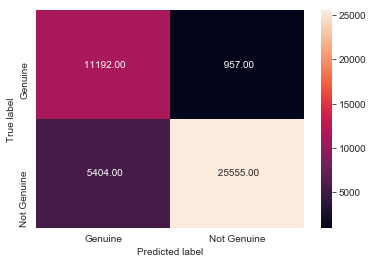


 Precision, Recall and Support:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     30959
           1       0.67      0.92      0.78     12149

   micro avg       0.85      0.85      0.85     43108
   macro avg       0.82      0.87      0.83     43108
weighted avg       0.88      0.85      0.86     43108


AUC : = 0.901


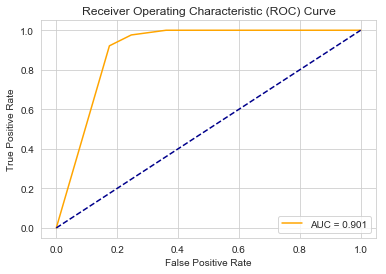

In [398]:
from sklearn.tree import DecisionTreeClassifier
clf_tree, cv_scores_tree = get_model(DecisionTreeClassifier(criterion='gini', max_depth=3), X_train, X_test, y_train, y_test )

## The Decision Tree classification gives F1- score for non genuine observations is 90% with Specificity (True negative rate) 85%. 


Model Report: 
Model score error with cv : Mean - 0.8947 | Stdf - 0.0075


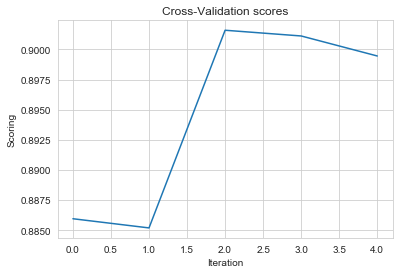

In [399]:
## Cross Validation Scores for Decision Tree
modelVal(cv_scores_tree,n_folds=5, plot = True)

In [400]:
cv_scores = pd.DataFrame()
cv_scores['DT'] = cv_scores_tree
cv_scores

,DT
0,0.886
1,0.885
2,0.902
3,0.901
4,0.899



Cross Validation Scores:

[0.89 0.9  0.92 0.92 0.92]

Accuracy:  0.8676347777674678

Confusion Matrix:


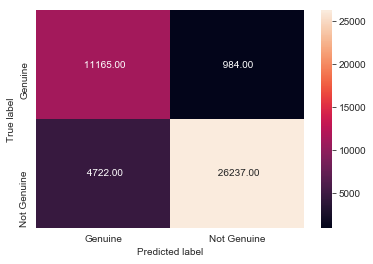


 Precision, Recall and Support:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     30959
           1       0.70      0.92      0.80     12149

   micro avg       0.87      0.87      0.87     43108
   macro avg       0.83      0.88      0.85     43108
weighted avg       0.89      0.87      0.87     43108


AUC : = 0.923


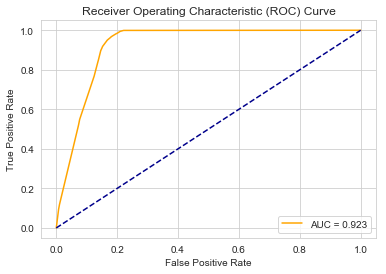

In [401]:
from sklearn.tree import DecisionTreeClassifier
clf_tree_entropy = get_model(DecisionTreeClassifier(criterion='entropy', max_depth=9), X_train, X_test, y_train, y_test )

In [402]:
def imp_features(features):
    feature_rank = pd.DataFrame({'feature': X_train.columns,
                                'importance': features})
    
    #Sorting the features based on importance
    feature_rank = feature_rank.sort_values('importance', ascending = False)
    plt.figure(figsize = (8,6))
    sns.barplot(y = 'feature', x = 'importance', data = feature_rank);

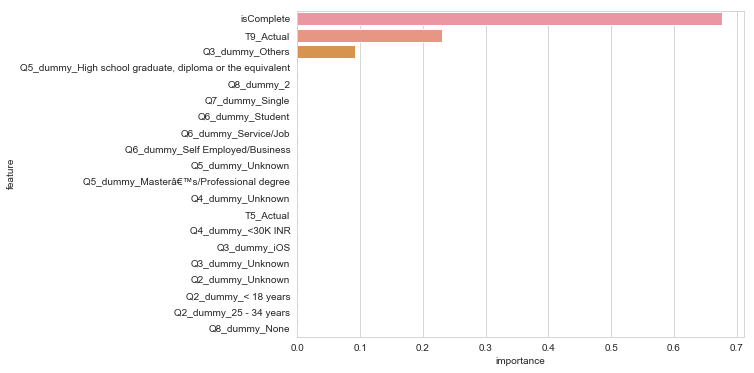

In [403]:
imp_features(clf_tree.feature_importances_)

In [404]:
## Predicting on Test data
dt_proba= clf_tree.predict_proba(X_test)
y_pred_df_DT = pd.DataFrame({"actual": y_test,
                          "predicted":clf_tree.predict(X_test),
                          "predicted_prob": dt_proba[:, 1]})

In [405]:
y_pred_df_DT.sample(10)

,actual,predicted,predicted_prob
57374,0,1,0.848
28861,0,0,0.000
69016,1,0,0.370
49359,1,1,0.848
71930,0,0,0.000
46699,0,0,0.000
47079,0,1,0.848
33601,0,0,0.000
46683,0,1,0.848
56722,0,1,0.848


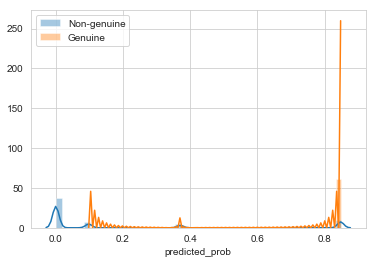

In [406]:
sns.distplot( y_pred_df_DT[y_pred_df_DT.actual == 0]['predicted_prob'], label = 'Non-genuine')
sns.distplot( y_pred_df_DT[y_pred_df_DT.actual == 1]['predicted_prob'], label = 'Genuine')
plt.legend()

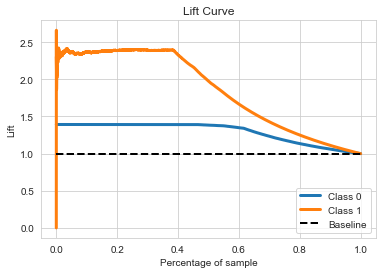

In [407]:
# Lift curve for DT

skplt.metrics.plot_lift_curve(y_test, dt_proba)

## 3. Random Forest


Cross Validation Scores:

[0.78 0.78 0.93 0.93 0.93]

Accuracy:  0.8404008536698525

Confusion Matrix:


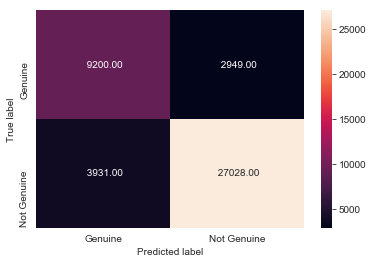


 Precision, Recall and Support:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     30959
           1       0.70      0.76      0.73     12149

   micro avg       0.84      0.84      0.84     43108
   macro avg       0.80      0.82      0.81     43108
weighted avg       0.84      0.84      0.84     43108


AUC : = 0.910


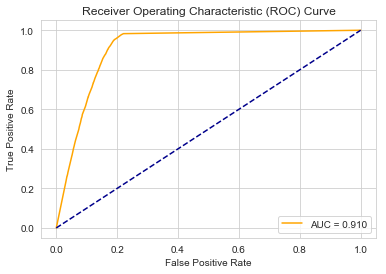

In [408]:
# Random Forest 
from sklearn.metrics import roc_curve,auc
rf_model, cv_scores_RF = get_model(RandomForestClassifier(), X_train, X_test, y_train, y_test )

### Random Forest is classifying the data with F1 score 85

## Hyper parametr tuning for RF

In [409]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [410]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


Cross Validation Scores:

[0.9  0.9  0.92 0.92 0.92]

Accuracy:  0.8673564071634036

Confusion Matrix:


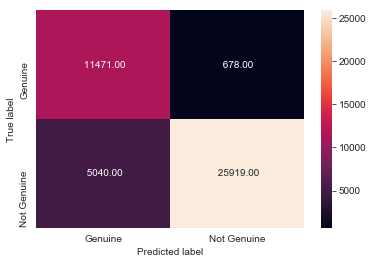


 Precision, Recall and Support:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     30959
           1       0.69      0.94      0.80     12149

   micro avg       0.87      0.87      0.87     43108
   macro avg       0.83      0.89      0.85     43108
weighted avg       0.90      0.87      0.87     43108


AUC : = 0.931


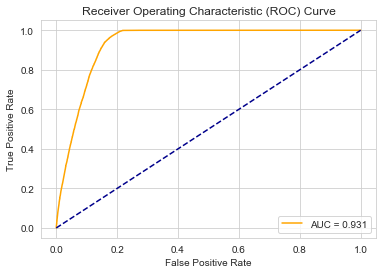

In [411]:
# Random forest with tuned hyper parameters
rf_tuned, cv_scores_RF = get_model(RandomForestClassifier(n_estimators = 100,
                                            max_depth = 15, criterion = 'entropy',
                                            bootstrap = False, random_state=42),
                     X_train, X_test, y_train, y_test )

## The Random Forest classification gives F1- score for non genuine observations as 90% with Specificity (True negative rate) 84%. 


Model Report: 
Model score error with cv : Mean - 0.9136 | Stdf - 0.0117


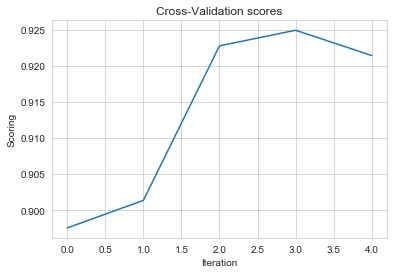

In [412]:
## Cross Validation Scores for Random Forest
modelVal(cv_scores_RF,n_folds=5, plot = True)

In [413]:
## Predicting on Test data
rf_probas = rf_tuned.predict_proba(X_test)
y_pred_df_RF = pd.DataFrame({"actual": y_test,
                          "predicted":rf_tuned.predict(X_test),
                          "predicted_prob": rf_probas[:, 1]})

In [414]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [415]:
y_pred_df_RF.sample(10)

,actual,predicted,predicted_prob
87500,0,0,0.000
22768,0,0,0.278
15333,0,0,0.005
79477,1,1,0.817
84262,1,1,0.798
99501,0,0,0.000
70577,0,1,0.691
31265,0,0,0.000
49933,1,1,0.828
109486,0,0,0.000


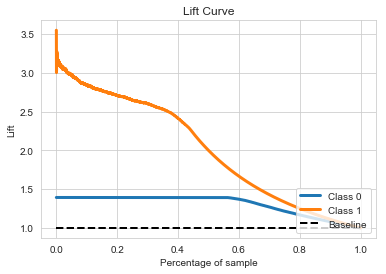

In [420]:
# Lift curve for RF

skplt.metrics.plot_lift_curve(y_test, rf_probas)

###  Finding important features

In [421]:
def imp_features(features):
    feature_rank = pd.DataFrame({'feature': X_train.columns,
                                'importance': features})
    
    #Sorting the features based on importance
    feature_rank = feature_rank.sort_values('importance', ascending = False)
    plt.figure(figsize = (8,6))
    sns.barplot(y = 'feature', x = 'importance', data = feature_rank);


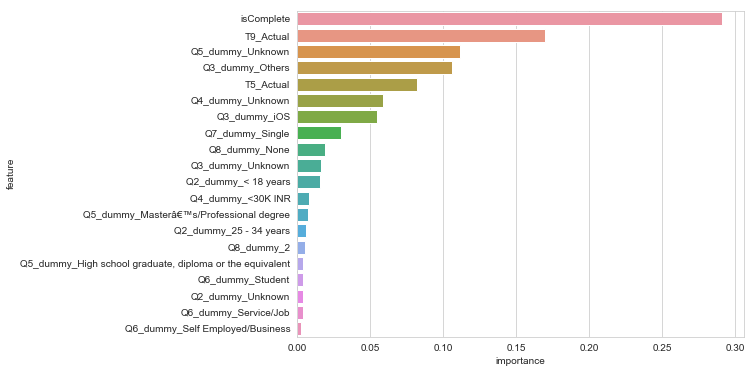

In [422]:
imp_features(rf_tuned.feature_importances_)

## 4. Gradient Boosting


Cross Validation Scores:

[0.76 0.77 0.93 0.93 0.93]

Accuracy:  0.8476848844761993

Confusion Matrix:


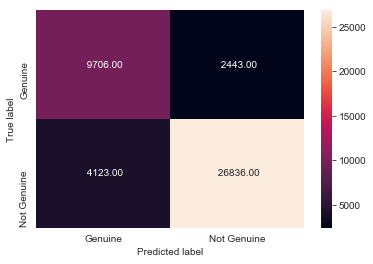


 Precision, Recall and Support:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     30959
           1       0.70      0.80      0.75     12149

   micro avg       0.85      0.85      0.85     43108
   macro avg       0.81      0.83      0.82     43108
weighted avg       0.86      0.85      0.85     43108


AUC : = 0.917


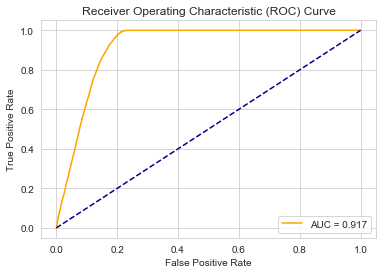

In [434]:
from sklearn.ensemble import GradientBoostingClassifier 
gboost_clf, cv_scores_gb = get_model(GradientBoostingClassifier(n_estimators=500, max_depth=10), X_train, X_test, y_train, y_test )

## The Gradient Boosting classification gives F1- score for non genuine observations as 89% with Specificity (True negative rate) 85%. 


Model Report: 
Model score error with cv : Mean - 0.8673 | Stdf - 0.0807


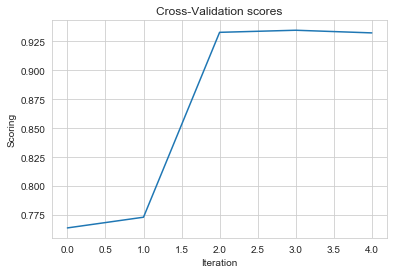

In [436]:
## Cross Validation Scores for Gradient Boosting
modelVal(cv_scores_gb,n_folds=5, plot = True)

In [437]:
## Predicting on Test data
gb_probas = gboost_clf.predict_proba(X_test)
y_pred_df_GB = pd.DataFrame({"actual": y_test,
                          "predicted":gboost_clf.predict(X_test),
                          "predicted_prob": gb_probas[:, 1]})

In [438]:
y_pred_df_GB.sample(10)

,actual,predicted,predicted_prob
115234,0,0,0.214
99771,1,1,0.591
113827,0,0,0.000
125502,0,1,0.890
13033,1,0,0.433
75834,1,1,0.881
83118,0,0,0.000
13695,0,1,0.801
58797,1,1,0.771
59674,1,1,0.852


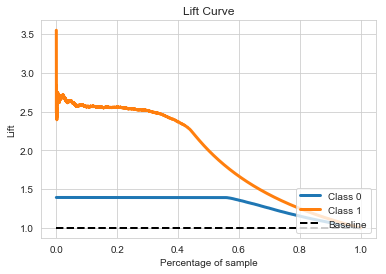

In [439]:
# Lift curve for GB

skplt.metrics.plot_lift_curve(y_test, gb_probas)

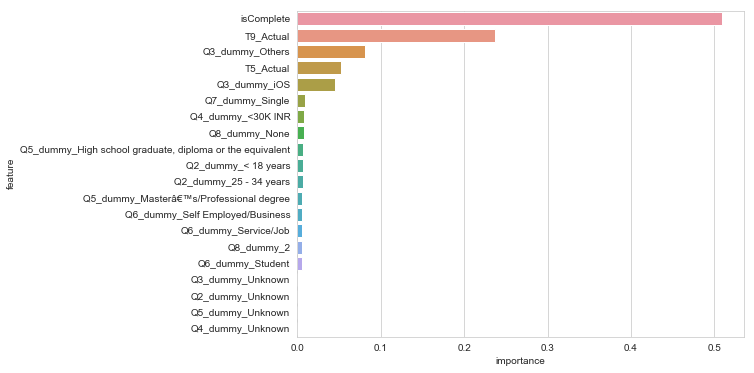

In [440]:
imp_features(gboost_clf.feature_importances_)

### 5. SVC

In [444]:
from sklearn import svm
from sklearn import metrics
svc_clf, cv_scores_svc = get_model(svm.SVC(probability=True, kernel='linear'), X_train, X_test, y_train, y_test )

KeyboardInterrupt: 

In [ ]:
## Cross Validation Scores for Support Vector Classification
modelVal(cv_scores_svc,n_folds=5, plot = True)

In [ ]:
## Predicting on Test data
svc_probas =svc_clf.predict_proba(X_test)
y_pred_df_SVC = pd.DataFrame({"actual": y_test,
                          "predicted":svc_clf.predict(X_test),
                          "predicted_prob": svc_probas[:, 1]})

In [ ]:
y_pred_df_SVC.sample(10)

In [ ]:
# Lift curve for SVC

skplt.metrics.plot_lift_curve(y_test, svc_probas)

In [ ]:
imp_features(svc_clf.coef)

In [ ]:
## Probability Calibration curves

In [441]:
## caliberation curve for predicted probablities
from sklearn.calibration import calibration_curve
logreg_y, logreg_x = calibration_curve(y_test, y_pred_df_LR.predicted_prob, n_bins=10)
dt_y, dt_x = calibration_curve(y_test, y_pred_df_DT.predicted_prob, n_bins=10)
rf_y, rf_x = calibration_curve(y_test, y_pred_df_RF.predicted_prob, n_bins=10)
gb_y, gb_x = calibration_curve(y_test, y_pred_df_GB.predicted_prob, n_bins=10)
#svm_y, svm_x = calibration_curve(y_test, y_pred_df_SVC.predicted_prob, n_bins=10)

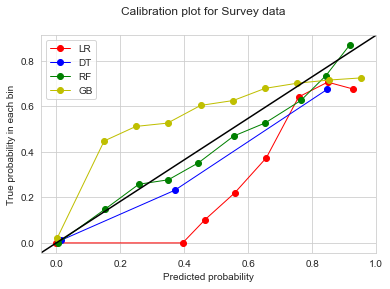

In [442]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(logreg_x,logreg_y, marker='o', linewidth=1, label='LR', color='r')
plt.plot(dt_x, dt_y, marker='o', linewidth=1, label='DT', color='b' )
plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='RF', color='g' )
plt.plot(gb_x, gb_y, marker='o', linewidth=1, label='GB', color='y')
#plt.plot(svm_x, svm_y, marker='o', linewidth=1, label='SVM', color='orange')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Survey data')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

#### Note: It can be observed here that Random Forest is well calibrated while Logistic regression and GB performs very badly. 
#### Decision Tree and  SVM are also giving good performance.

### Compare cross validation scores for the models

In [443]:
cv_scores = pd.DataFrame({"LR": cv_scores_lr,
                         "DT": cv_scores_tree,
                         "RF": cv_scores_RF,
                         "GB": cv_scores_gb,
                         "SVC": cv_scores_svc})

cv_scores

NameError: name 'cv_scores_svc' is not defined

In [ ]:
cv_means = cv_scores.mean()
cv_std = cv_scores.std()

In [ ]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","DecisionTree",                                                                                   
"RandomForest","GradientBoosting","SVC"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

## Validation:    


Accuracy:  0.8541498290332608

Confusion Matrix:


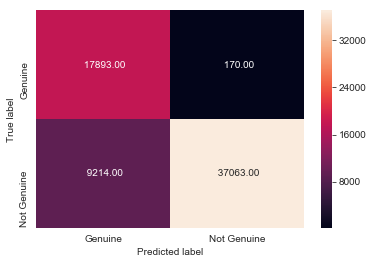


 Precision, Recall and Support:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     46277
           1       0.66      0.99      0.79     18063

   micro avg       0.85      0.85      0.85     64340
   macro avg       0.83      0.90      0.84     64340
weighted avg       0.90      0.85      0.86     64340


AUC : = 0.929


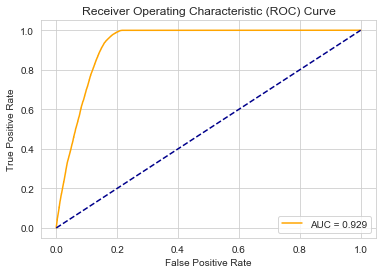

In [445]:
# Predict on Validation set
X_Validation = X_Validation[X_train.columns]
y_pred_validation = rf_tuned.predict(X_Validation)   
print("\nAccuracy: ", accuracy_score(y_Validation, y_pred_validation))    
print("\nConfusion Matrix:")
cm = confusion_matrix(y_Validation, y_pred_validation, [1,0])
    
sns.heatmap(cm, annot=True, fmt=' .2f', xticklabels= ["Genuine", "Not Genuine"],
               yticklabels= ["Genuine", "Not Genuine"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
    
print("\n Precision, Recall and Support:")  
print(classification_report(y_true=y_Validation, y_pred=y_pred_validation))
# predict probabilities
probs_validation = rf_tuned.predict_proba(X_Validation)
# keep probabilities for the positive outcome only
y_pred_validation_score = probs_validation[:, 1]
fpr, tpr, thresholds = roc_curve(y_Validation, y_pred_validation_score)
roc_auc = auc(fpr,tpr) 
print('\nAUC : = %0.3f'% roc_auc )
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='orange', label='AUC = %0.3f'% roc_auc)    
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Conclusion

### From the above analysis it can be observed that the Random forest classifies the records better. 

### The feature importance of RF is shown below

In [424]:
#imp_features(rf_tuned.feature_importances_)

In [446]:
feature_rank = pd.DataFrame({'Feature': X_train.columns,
                                'importance': rf_tuned.feature_importances_})
    
#Sorting the features based on importance
feature_rank = feature_rank.sort_values('importance', ascending = False)
plt.figure(figsize = (8,6))
sns.barplot(y = 'feature', x = 'importance', data = feature_rank);

ValueError: Could not interpret input 'feature'

<Figure size 576x432 with 0 Axes>

### The top 5 features are isComplete flag, T9_Actual, Q5_dummy_Unknown, Q3_dummy_Others, T5_Actual
### The importance score is normalised and shows the relative importance of features.

### Cumulative sum of features

In [428]:
feature_rank['rank_cumsum'] = feature_rank.importance.cumsum()*100
feature_rank.head(10)

,feature,importance,rank_cumsum
0,isComplete,0.291,29.119
2,T9_Actual,0.170,46.104
13,Q5_dummy_Unknown,0.111,57.236
6,Q3_dummy_Others,0.106,67.815
1,T5_Actual,0.082,75.994
10,Q4_dummy_Unknown,0.059,81.883
8,Q3_dummy_iOS,0.055,87.364
17,Q7_dummy_Single,0.030,90.384
19,Q8_dummy_None,0.019,92.294
7,Q3_dummy_Unknown,0.016,93.939


### The top five features provide 75% of the information in the data with respect to the outcome variable.